# Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For randomized data splitting
from sklearn.model_selection import train_test_split

## 1. Logistic Regression
from sklearn.linear_model import LogisticRegression

## 2. Linear Discriminat Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
from sklearn import metrics

# calculate accuracy measures and confusion matrix

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, r2_score, mean_squared_error, recall_score, precision_score

from sklearn.model_selection import cross_val_score

In [4]:
#GridsearchCV for model tuning
from sklearn.model_selection import GridSearchCV
#KNN
from sklearn.neighbors import KNeighborsClassifier
#NaiveBayes
from sklearn.naive_bayes import GaussianNB

# Problem 1

# Load Dataset

In [5]:
df = pd.read_excel('Election_Data.xlsx', sheet_name='Election_Dataset_Two Classes')

1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.
4

In [6]:
df.shape

(1525, 10)

In [7]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [8]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [10]:
df.dtypes

Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

The 'Unnamed: 0' can be dropped. The 'vote', 'gender' need to be converted to categorical based on the data dictionary provided.

In [11]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
df.rename(columns={'economic.cond.national': 'economic_cond_national'}, inplace=True)
df.rename(columns={'economic.cond.household': 'economic_cond_household'},inplace=True)
df.rename(columns={'political.knowledge': 'political_knowledge'},inplace=True)
df.head()

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic_cond_national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic_cond_household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political_knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [14]:
df.isnull().sum()

vote                       0
age                        0
economic_cond_national     0
economic_cond_household    0
Blair                      0
Hague                      0
Europe                     0
political_knowledge        0
gender                     0
dtype: int64

There are no null values in the dataset provided.

In [15]:
df.duplicated().sum()

8

In [16]:
# Filter the DataFrame to show only the duplicate rows
duplicate_data = df[df.duplicated(keep=False)]
duplicate_data.head(16)

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
2,Labour,35,4,4,5,2,3,2,male
67,Labour,35,4,4,5,2,3,2,male
86,Conservative,53,3,4,2,2,6,0,female
333,Labour,38,2,4,2,2,4,3,male
390,Labour,39,3,4,4,2,5,2,male
577,Conservative,74,4,3,2,4,8,2,female
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
916,Labour,29,4,4,4,2,2,2,female
983,Conservative,74,4,3,2,4,8,2,female


These duplicates need to be dropped because they do not add any value to the study, be it associated with different people.

In [17]:
# Remove duplicates and update the DataFrame
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(1517, 9)

In [19]:
df.duplicated().sum()

0

In [20]:
for i in df.columns:
    if df[i].dtype == 'int64':
        all_integers = (df[i] % 1 == 0).all()
        if all_integers:
            print(f'{i} observations are integers.')
        else:
            print(f'{i} may contain non-integers observations.')


age observations are integers.
economic_cond_national observations are integers.
economic_cond_household observations are integers.
Blair observations are integers.
Hague observations are integers.
Europe observations are integers.
political_knowledge observations are integers.


All the observations in the int64 type are truly int64

Text(0.5, 1.0, 'Bar Chart of age')

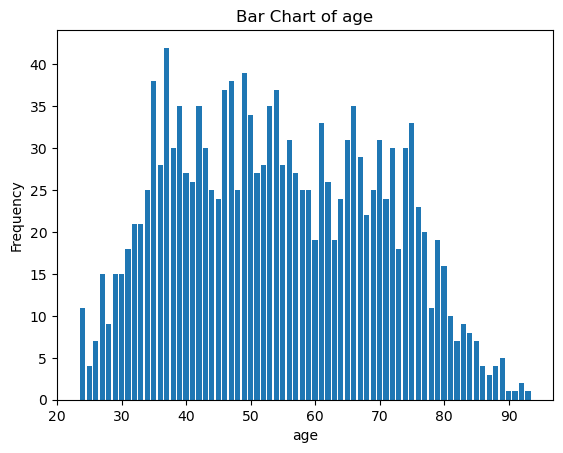

In [21]:
value_counts = df['age'].value_counts()
plt.figure()
plt.bar(value_counts.index, value_counts.values)
# Set the x-axis limits
plt.xlim(left=20)

plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Bar Chart of age')

There is a very slight positive/right skewness in age distribution. This means that the distribution of ages is slightly skewed towards the higher values.

<AxesSubplot:ylabel='age'>

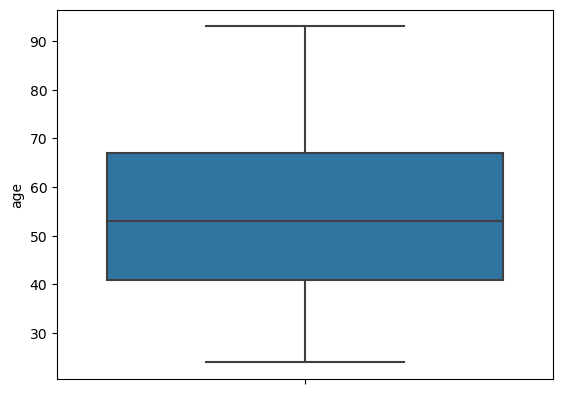

In [22]:
sns.boxplot(y = df['age'], data = df)

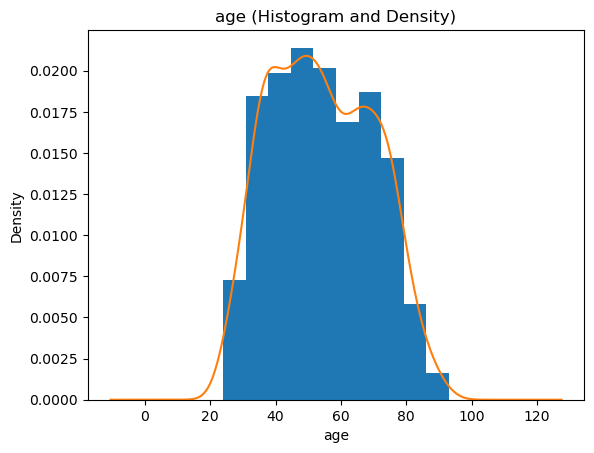

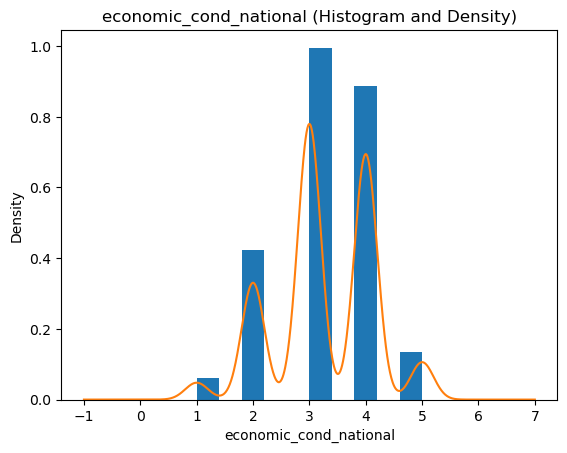

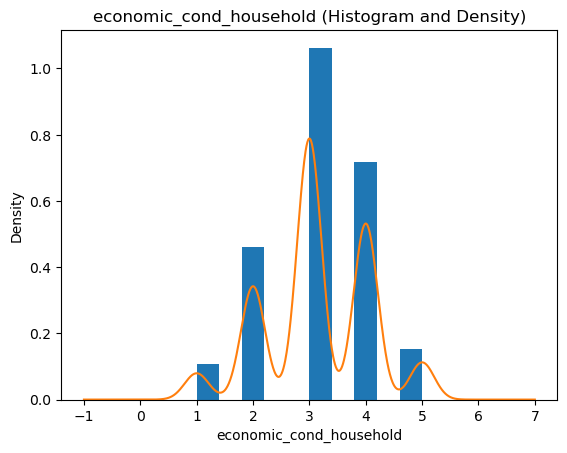

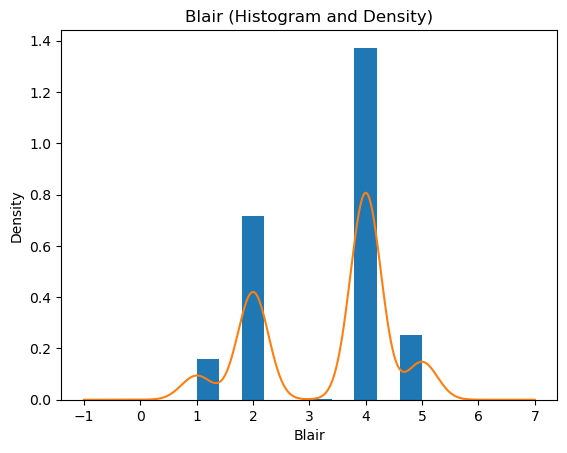

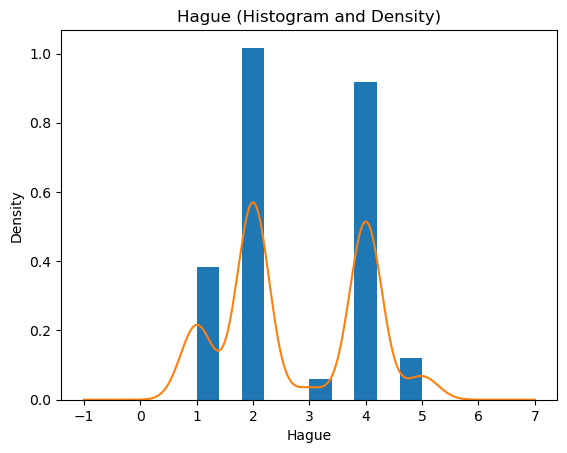

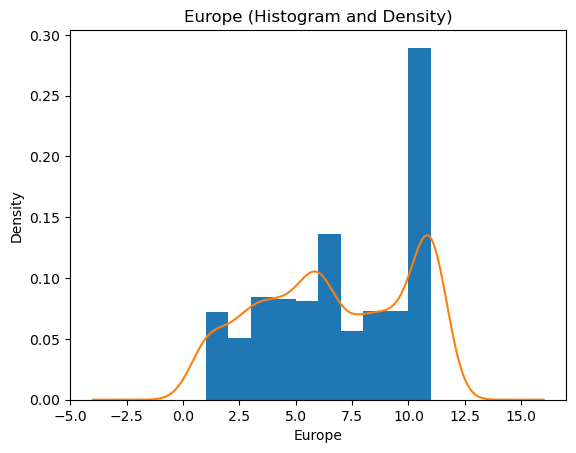

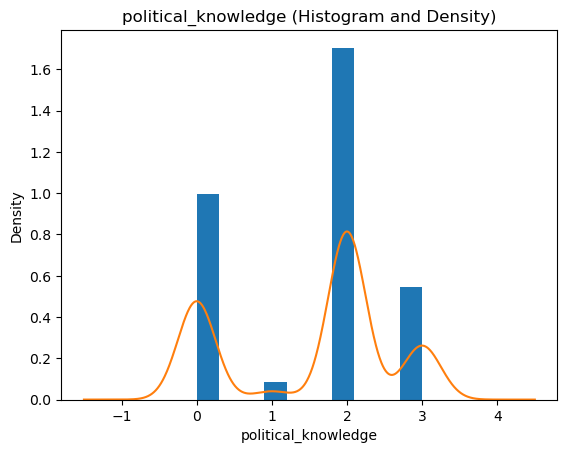

In [23]:
# Plotting histogram for each column
plt.figure()
for i in df.columns:
    if df[i].dtype=='int64':
        df[i].plot(kind='hist', density=True)
        df[i].plot(kind='kde', title=f"{i} (Histogram and Density)")
        plt.xlabel(i)
        plt.show()

1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.
7

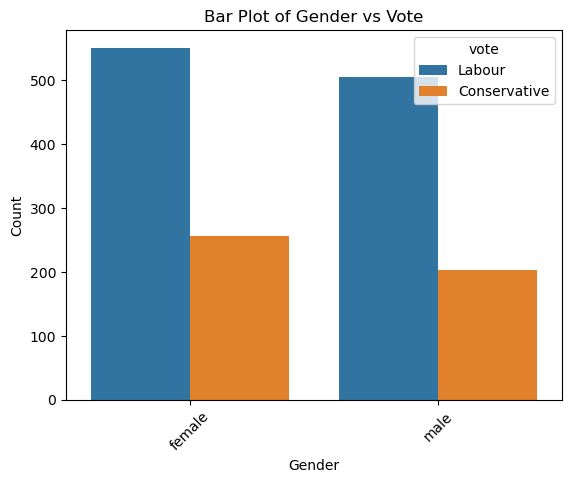

In [24]:
# Create the bar plot
sns.countplot(data=df, x='gender', hue='vote')
# Set the labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Plot of Gender vs Vote')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

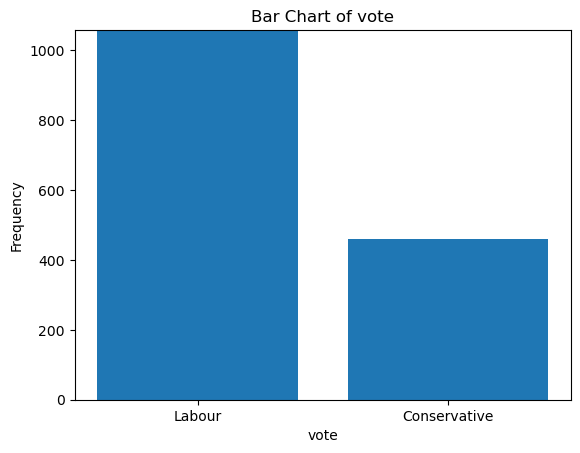

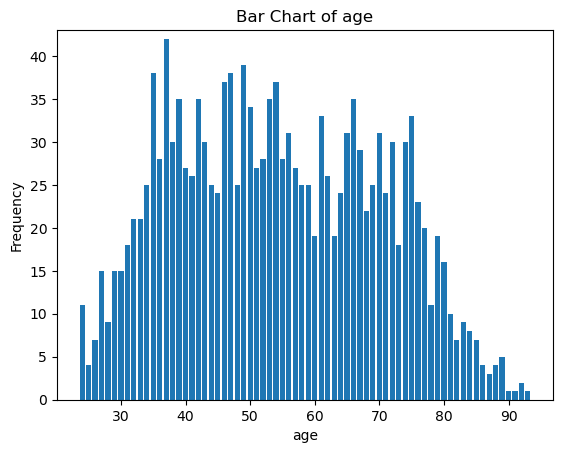

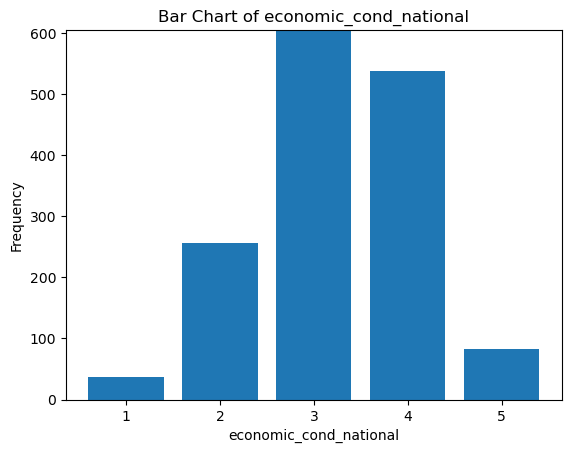

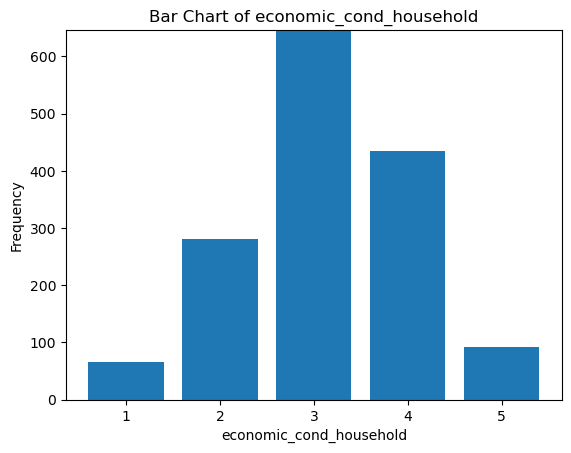

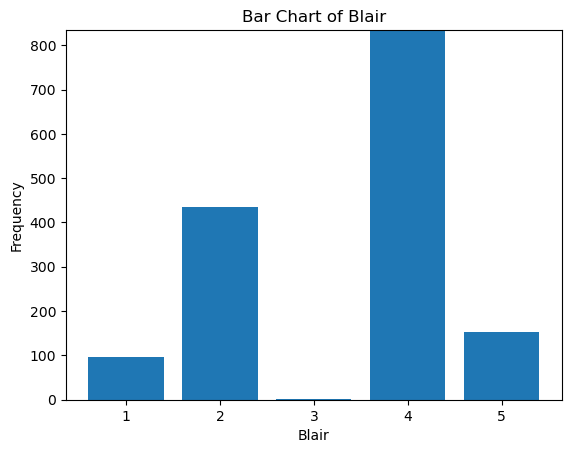

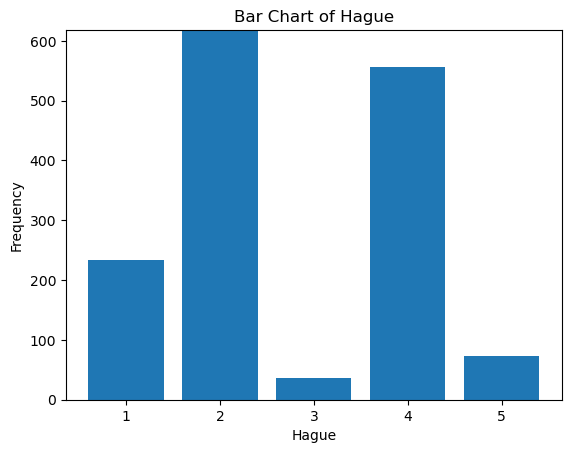

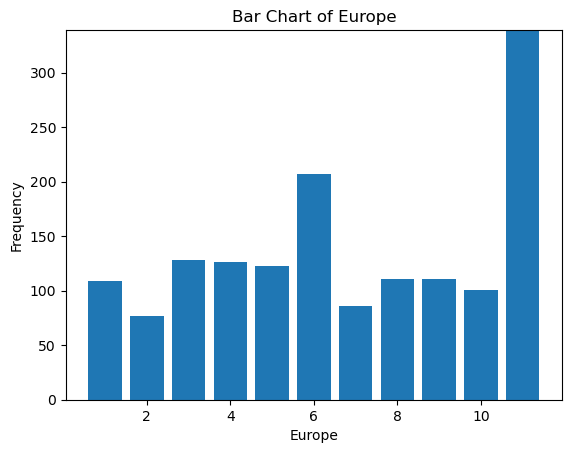

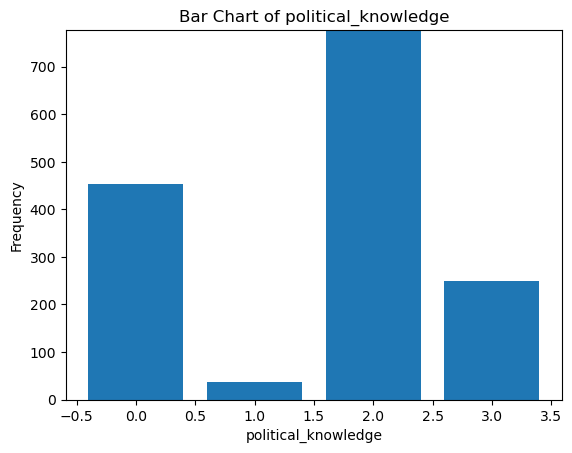

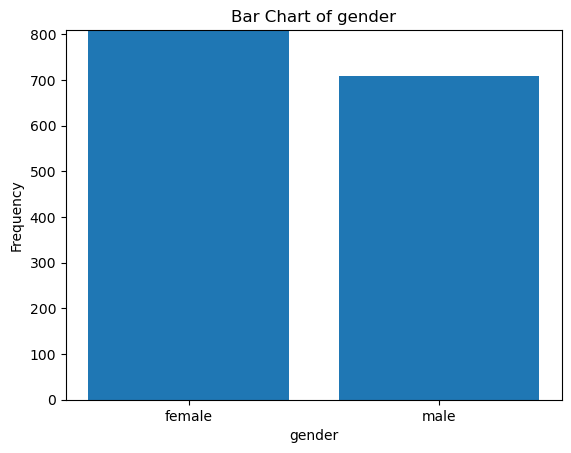

In [25]:
plt.figure(figsize=(10, 6))

# Loop through each column in the DataFrame
for column in df.columns:
    # Plot a histogram for numerical columns
    if df[column].dtype in [int, float]:
        plt.figure()
        sns.histplot(df[column], bins=10)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Histogram of {column}')
        # Set x-axis and y-axis limits based on the data range
        plt.xlim(df[column].min(), df[column].max())
        plt.ylim(0, None)

    # Plot a bar chart for categorical columns
    else:
        value_counts = df[column].value_counts()
        plt.figure()
        plt.bar(value_counts.index, value_counts.values)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Bar Chart of {column}')
        # Set y-axis limit to accommodate the tallest bar
        plt.ylim(0, value_counts.max() + 1)

    # Show the plot
    plt.show()


In [26]:
df[['vote','gender']].value_counts()

vote          gender
Labour        female    551
              male      506
Conservative  female    257
              male      203
dtype: int64

Quick bivariate analysis on Vote & Gender suggests that majority of votes are with Labour party. Within the party votes, there is no major parity on how either gender votes on a party

In [27]:
## We are coding up the 'gender' variable in #female as 1, male 0
df['gender']=np.where(df['gender'] =='female', '1', df['gender'])
df['gender']=np.where(df['gender'] =='male', '0', df['gender'])
df['gender'] = df['gender'].astype('int64')

In [28]:
df.head()

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
0,Labour,43,3,3,4,1,2,2,1
1,Labour,36,4,4,4,4,5,2,0
2,Labour,35,4,4,5,2,3,2,0
3,Labour,24,4,2,2,1,4,0,1
4,Labour,41,2,2,1,1,6,2,0


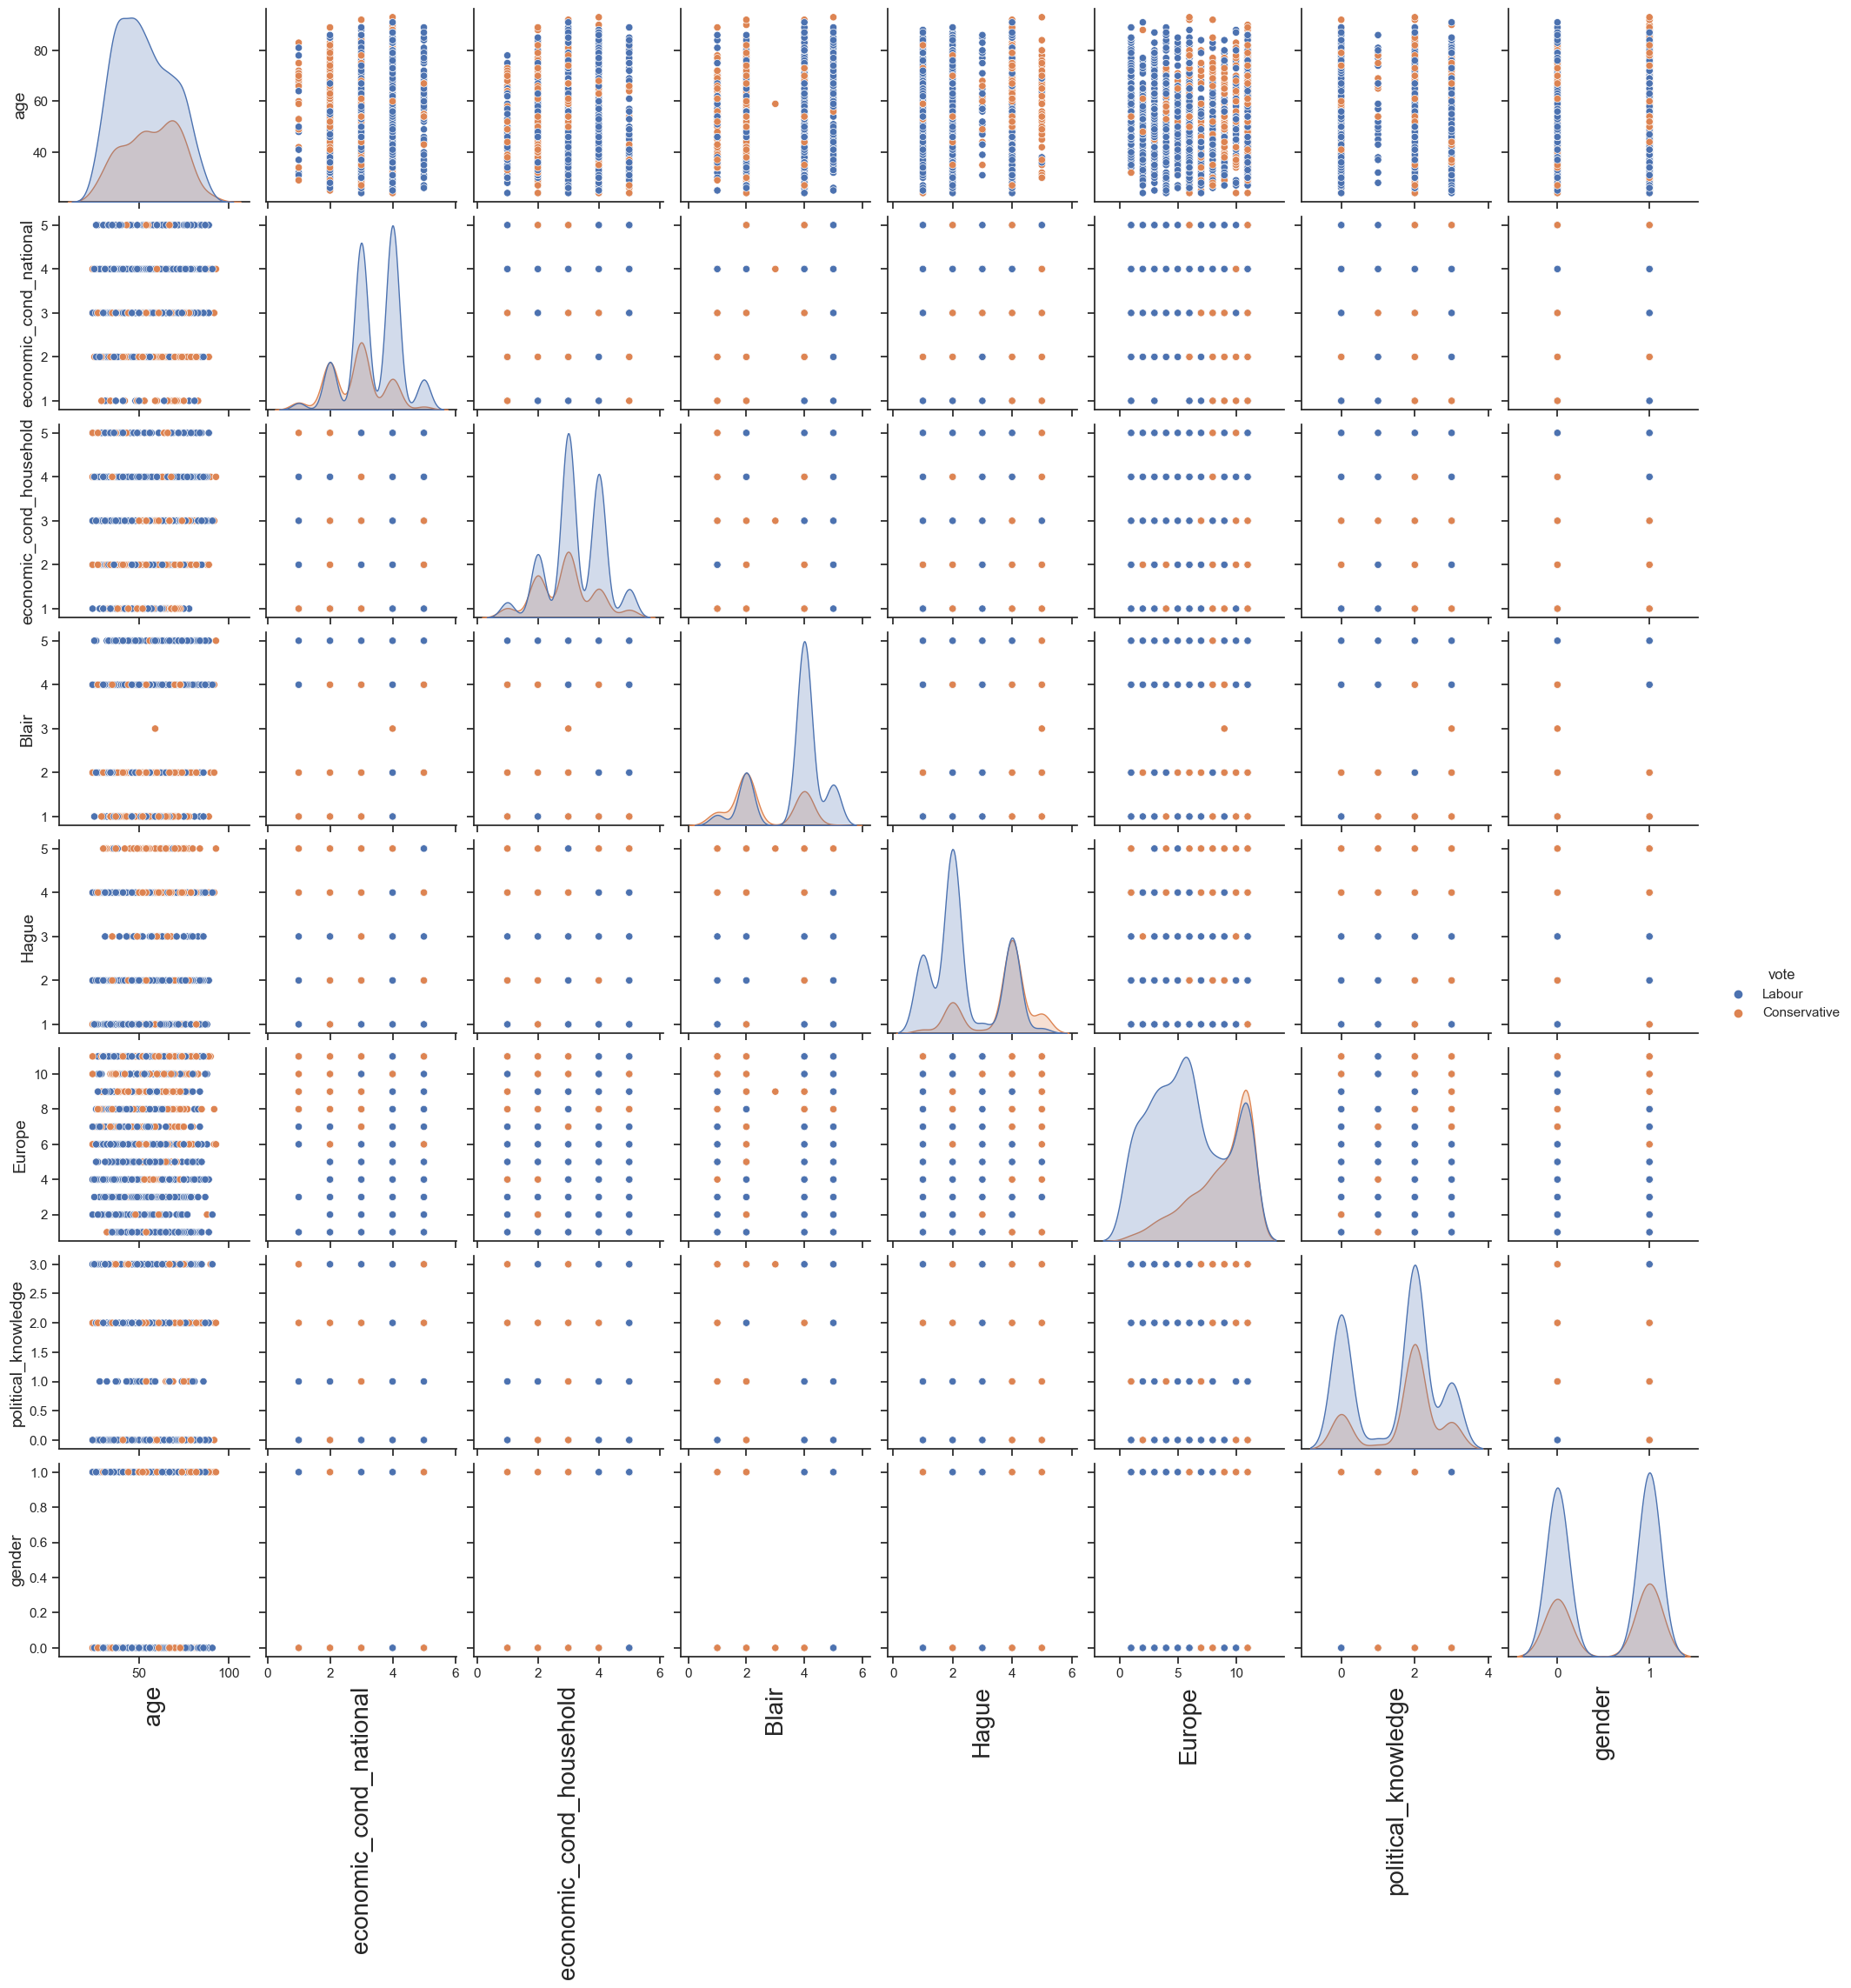

In [29]:
sns.set(style="ticks")

# Create the pairplot
g = sns.pairplot(df, hue='vote', diag_kind='kde')

# Increase the font size and rotation of x-axis titles
for i in range(g.axes.shape[0]):
    for j in range(g.axes.shape[1]):
        ax = g.axes[i, j]
        if i == g.axes.shape[0] - 1:
            ax.set_xlabel(ax.get_xlabel(), fontsize=20)
            ax.xaxis.label.set_rotation(90)  # Adjust rotation angle as needed
        if j == 0:
            ax.set_ylabel(ax.get_ylabel(), fontsize=14, rotation=90)

# Show the plot
plt.show()


In [30]:
df.corr()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598,0.017933
economic_cond_national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510,-0.055664
economic_cond_household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528,-0.033102
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299,-0.067624
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906,0.028309
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197,0.076059
political_knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000,-0.156923
gender,0.017933,-0.055664,-0.033102,-0.067624,0.028309,0.076059,-0.156923,1.000000


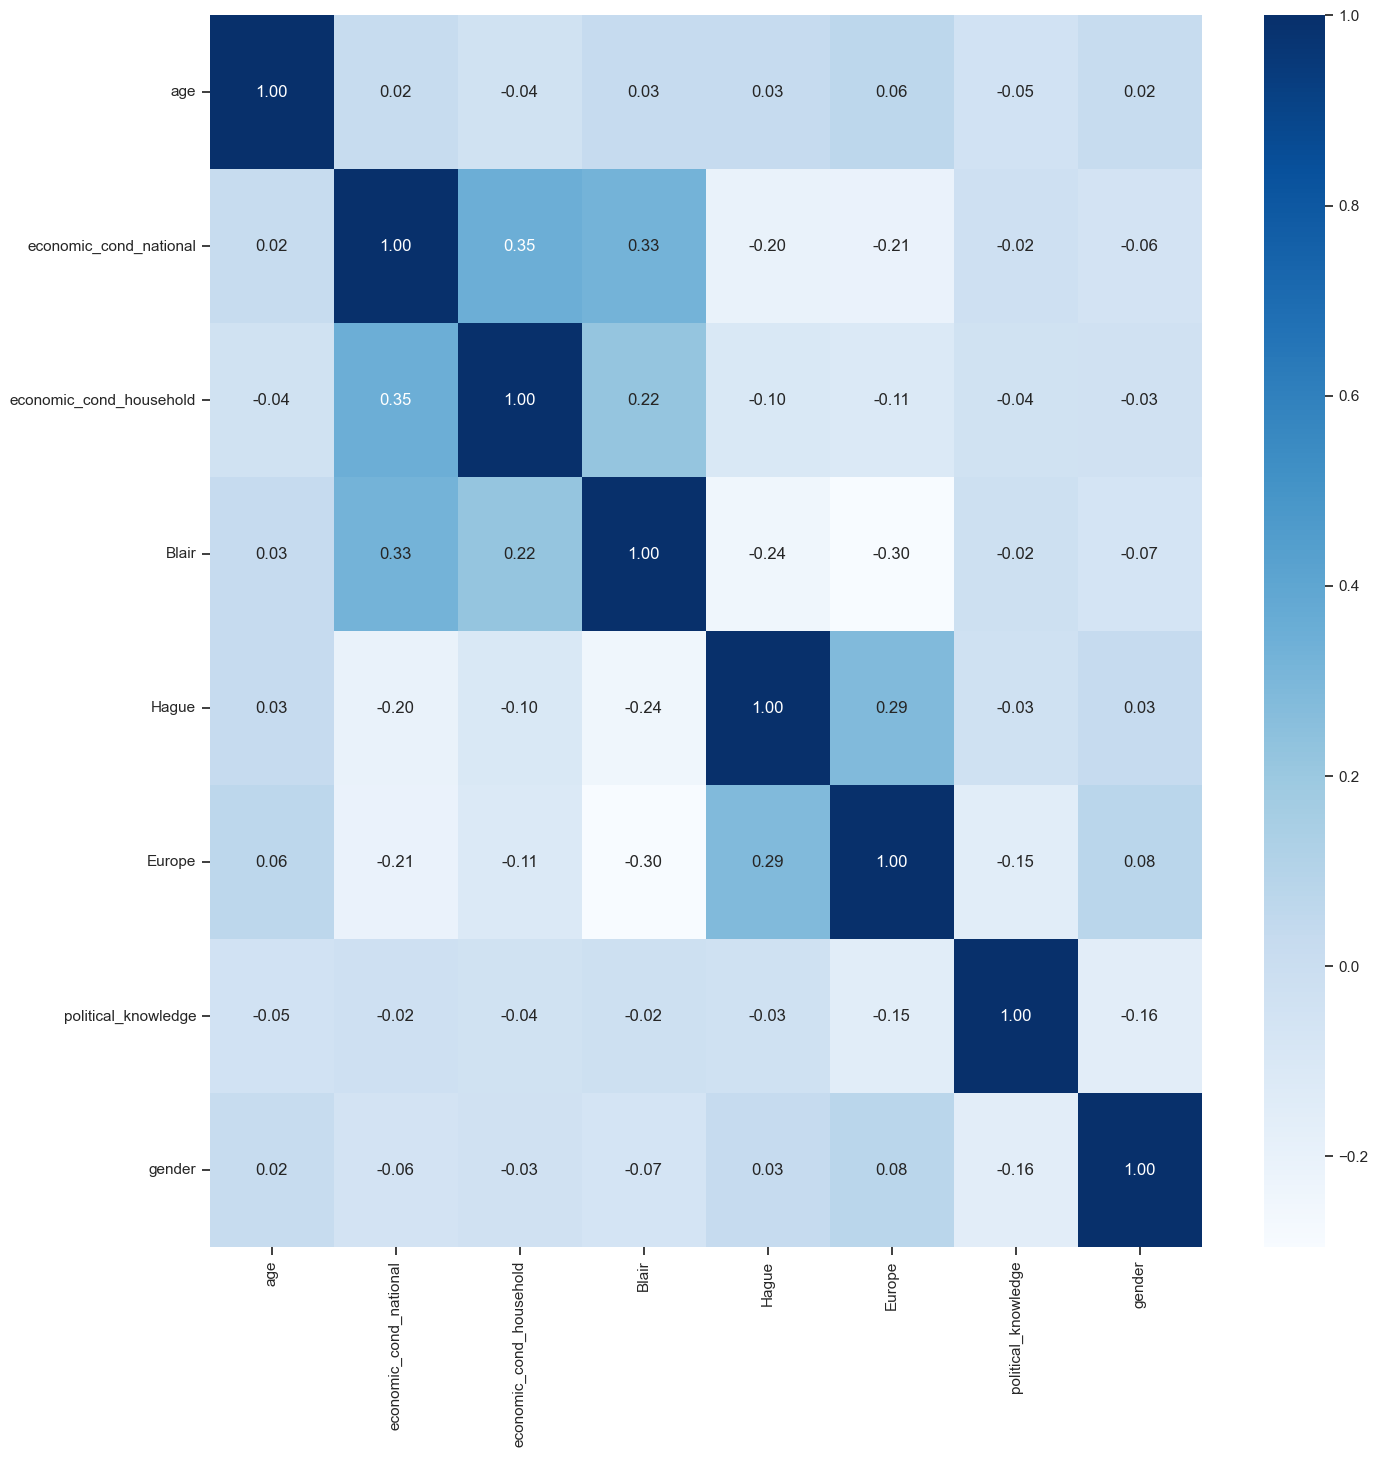

In [31]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

Age has a very weak positive correlation (0.0186) with economic_cond_national, indicating a slight relationship between age and the perception of national economic conditions.

Economic_cond_national has a moderate positive correlation (0.348) with economic_cond_household, suggesting that individuals who perceive national economic conditions positively also tend to perceive their household economic conditions positively.

Blair has a moderate positive correlation (0.326) with economic_cond_national, indicating that individuals who support Blair's party (Labour) are more likely to perceive positive national economic conditions.

Hague has a weak negative correlation (-0.201) with economic_cond_national, suggesting that individuals who support Hague's party (Conservative) are less likely to perceive positive national economic conditions.

Europe has a weak negative correlation (-0.209) with economic_cond_national, implying that individuals who support greater European integration are less likely to perceive positive national economic conditions.

Political_knowledge has a weak negative correlation (-0.157) with gender, suggesting that individuals with higher political knowledge are slightly less likely to be male.

Political_knowledge has a weak positive correlation (0.076) with Europe, indicating that individuals with higher political knowledge are slightly more likely to support Europe sentiment.

! We should remember co-relation does not mean causation. For more insights a detailed analysis of data should be done.

1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.
4

In [32]:
df['vote'].value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [33]:
## We are coding up the 'vote' variable in #Labour as 1, Conservative 0
df['vote']=np.where(df['vote'] =='Labour', '1', df['vote'])
df['vote']=np.where(df['vote'] =='Conservative', '0', df['vote'])

In [34]:
df['vote'] = df['vote'].astype('int64')

In [35]:
df.head()

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
0,1,43,3,3,4,1,2,2,1
1,1,36,4,4,4,4,5,2,0
2,1,35,4,4,5,2,3,2,0
3,1,24,4,2,2,1,4,0,1
4,1,41,2,2,1,1,6,2,0


In [36]:
df.tail()

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
1520,0,67,5,3,2,4,11,3,0
1521,0,73,2,2,4,4,8,2,0
1522,1,37,3,3,5,4,2,2,0
1523,0,61,3,3,1,4,11,2,0
1524,0,74,2,3,2,4,11,0,1


In [37]:
df.dtypes

vote                       int64
age                        int64
economic_cond_national     int64
economic_cond_household    int64
Blair                      int64
Hague                      int64
Europe                     int64
political_knowledge        int64
gender                     int64
dtype: object

Scaling is not needed for the categorical variables.  Scaling is beneficial on the 'age' variable as the observations,min, max are higher in magnitude compared to corresponding values in other features. StandardScaler can be used for just 'age' variable.

Alternately, 'age' can be binned with labels from 0,1,2,3 & no scaling will be required on any of the variables.

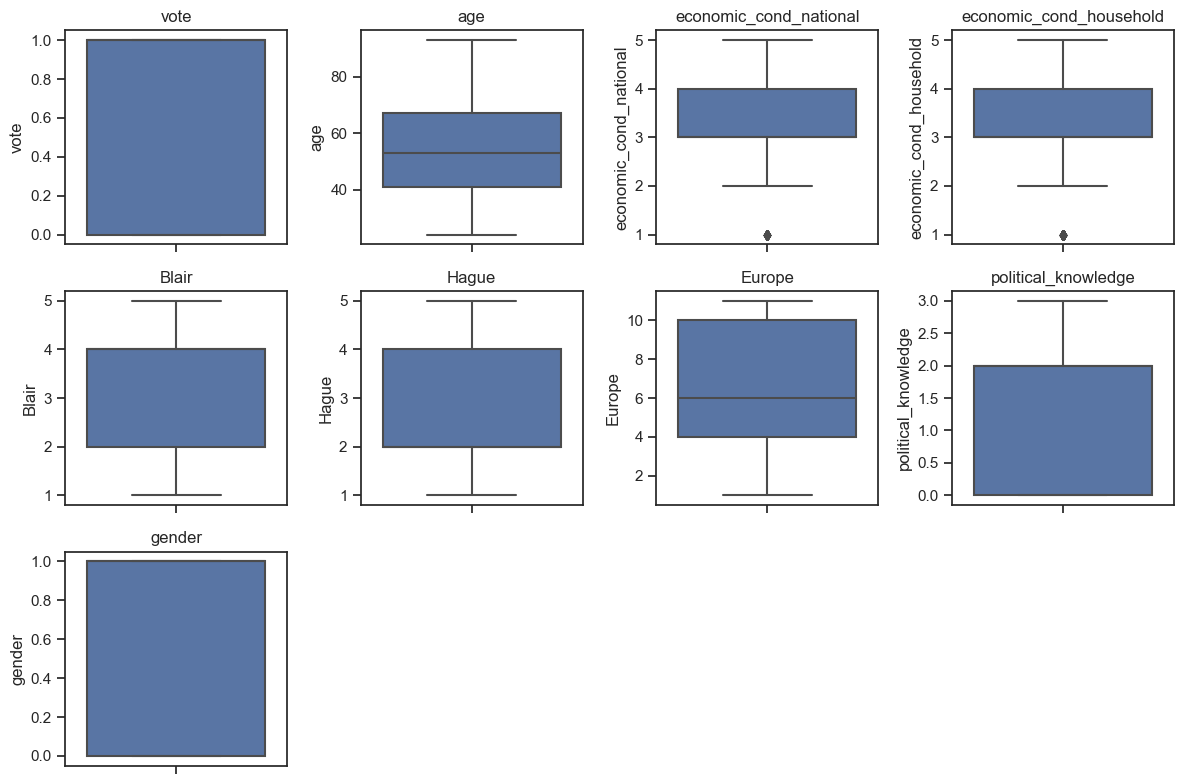

In [38]:
plt.figure(figsize = (12,8))
feature_list = df.columns

for i in range(len(feature_list)):
        plt.subplot(3,4, i + 1)
        sns.boxplot(y = df[feature_list[i]], data = df)
        plt.title(feature_list[i])
        plt.tight_layout()

In [39]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25, 0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [40]:
feature_out = ['economic_cond_national', 'economic_cond_household']
for i in feature_out:
        LL,UL=remove_outlier(df[i])
        df[i] = np.where(df[i] > UL, UL, df[i])
        df[i] = np.where(df[i] < LL, LL, df[i])

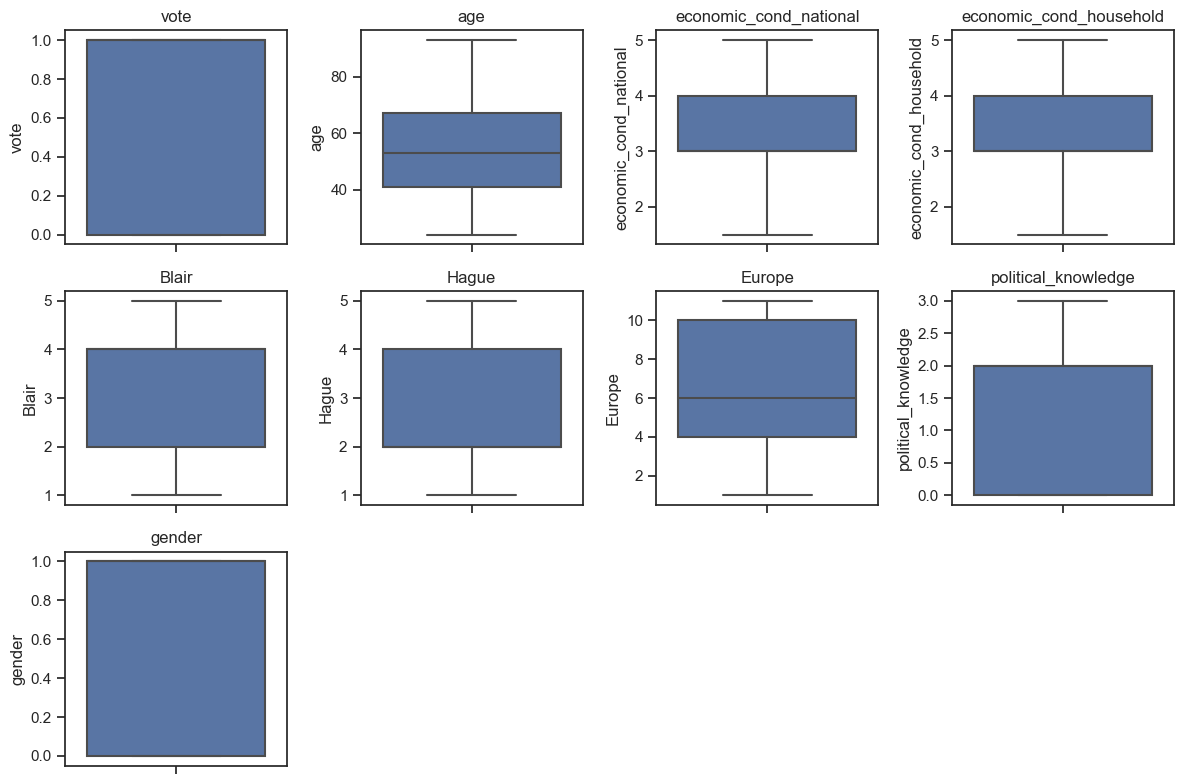

In [41]:
plt.figure(figsize = (12,8))
feature_list = df.columns

for i in range(len(feature_list)):
        plt.subplot(3,4, i + 1)
        sns.boxplot(y = df[feature_list[i]], data = df)
        plt.title(feature_list[i])
        plt.tight_layout()

## Scaling

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vote,1517.0,0.696770,0.459805,0.0,0.0,1.0,1.0,1.0
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic_cond_national,1517.0,3.257416,0.853647,1.5,3.0,3.0,4.0,5.0
economic_cond_household,1517.0,3.159196,0.886279,1.5,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political_knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0
gender,1517.0,0.532630,0.499099,0.0,0.0,1.0,1.0,1.0


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Reshape the selected columns to have a single feature
scaled_values = scaler.fit_transform(df['age'].values.reshape(-1, 1))

# Update the selected columns with the scaled values
df['age'] = scaled_values

df.head()

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
0,1,0.275362,3.0,3.0,4,1,2,2,1
1,1,0.173913,4.0,4.0,4,4,5,2,0
2,1,0.159420,4.0,4.0,5,2,3,2,0
3,1,0.000000,4.0,2.0,2,1,4,0,1
4,1,0.246377,2.0,2.0,1,1,6,2,0


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vote,1517.0,0.696770,0.459805,0.0,0.000000,1.00000,1.000000,1.0
age,1517.0,0.438279,0.227561,0.0,0.246377,0.42029,0.623188,1.0
economic_cond_national,1517.0,3.257416,0.853647,1.5,3.000000,3.00000,4.000000,5.0
economic_cond_household,1517.0,3.159196,0.886279,1.5,3.000000,3.00000,4.000000,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.000000,4.00000,4.000000,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.000000,2.00000,4.000000,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.000000,6.00000,10.000000,11.0
political_knowledge,1517.0,1.540541,1.084417,0.0,0.000000,2.00000,2.000000,3.0
gender,1517.0,0.532630,0.499099,0.0,0.000000,1.00000,1.000000,1.0


## Co-relation Heatmap

In [45]:
df.corr()

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
vote,1.000000,-0.109274,0.304028,0.176807,0.426606,-0.468186,-0.384612,-0.111589,-0.034464
age,-0.109274,1.000000,0.022283,-0.044403,0.032084,0.031144,0.064562,-0.046598,0.017933
economic_cond_national,0.304028,0.022283,1.000000,0.344462,0.323603,-0.199175,-0.206605,-0.029273,-0.054950
economic_cond_household,0.176807,-0.044403,0.344462,1.000000,0.216653,-0.099644,-0.112186,-0.040521,-0.033001
Blair,0.426606,0.032084,0.323603,0.216653,1.000000,-0.243508,-0.295944,-0.021299,-0.067624
Hague,-0.468186,0.031144,-0.199175,-0.099644,-0.243508,1.000000,0.285738,-0.029906,0.028309
Europe,-0.384612,0.064562,-0.206605,-0.112186,-0.295944,0.285738,1.000000,-0.151197,0.076059
political_knowledge,-0.111589,-0.046598,-0.029273,-0.040521,-0.021299,-0.029906,-0.151197,1.000000,-0.156923
gender,-0.034464,0.017933,-0.054950,-0.033001,-0.067624,0.028309,0.076059,-0.156923,1.000000


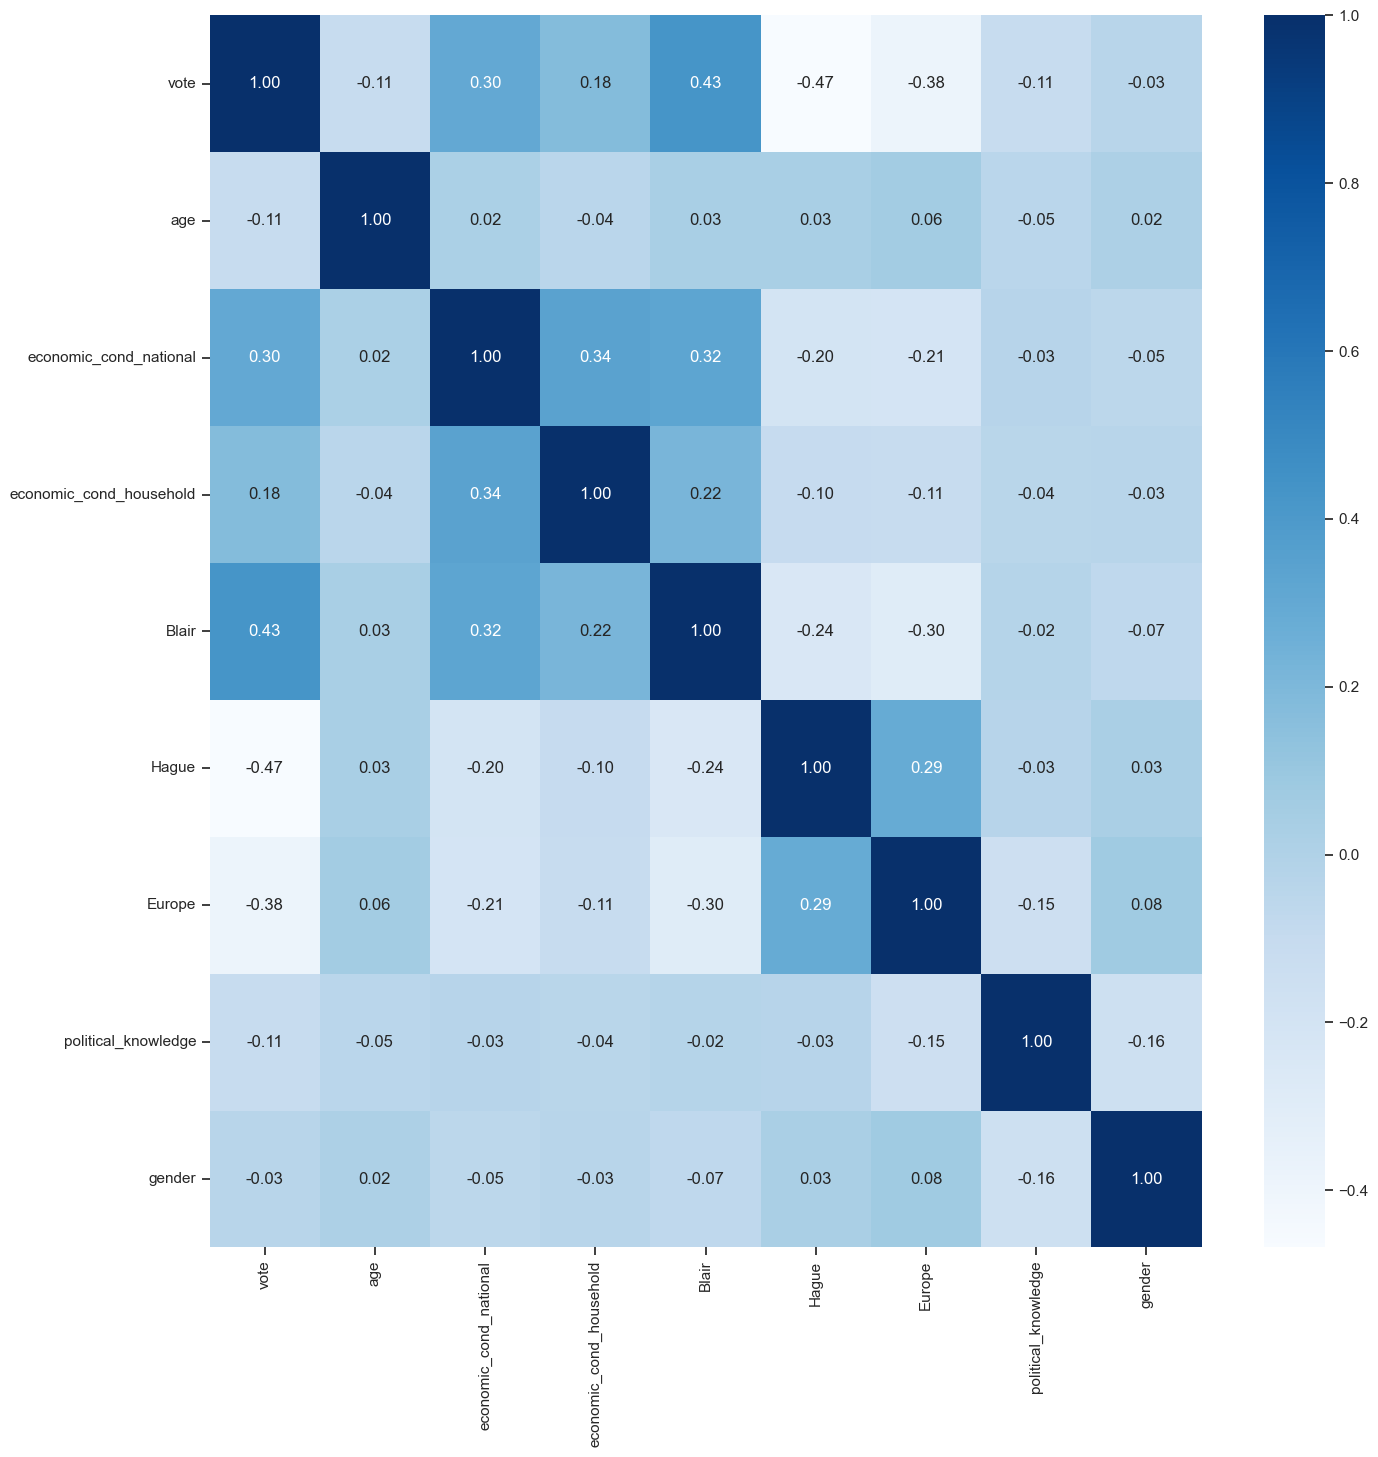

In [46]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

Co-relation between independent variables is discussed in Bivariate analysis using heatmap.
Now, based on the correlation matrix with 'vote' feature, below are comments about individual variables on 'vote':

1. Co-relation of 'vote' can be seen with Blair, age, economic_cond_national, economic_cond_household.
2. Vote (target variable) has moderate positive correlation with Blair (0.43), suggesting as Blair assessment value increases, the likelihood of voting for the Labour party also increases. This can be understood as Blair is leader of Labour party.

Similarly, Hague (Assessment of the Conservative leader) has a moderate negative correlation with Vote (-0.47), suggesting that a higher assessment of the Conservative leader is associated with a lower likelihood of voting for the Labour party & higher .

3. Economic condition variables (economic_cond_national and economic_cond_household) show moderate and slightly positive correlations with Vote respectively, indicating that as the perception of economic conditions improves, the likelihood of voting for either party increases.

4. Older individuals may be slightly less likely to vote for either party.

## Train Test Split

In [47]:
X= df.drop(['vote'], axis=1)
y= df['vote']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= .3, random_state= 1, stratify=y)

In [48]:
X_train.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
533,0.681159,3.0,3.0,4,2,11,0,1
708,0.478261,4.0,5.0,4,1,3,2,1
1144,0.000000,3.0,4.0,2,4,11,0,0
1081,0.275362,4.0,4.0,2,3,5,0,0
957,0.188406,3.0,2.0,4,2,7,2,0


In [49]:
X_test.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
274,0.681159,2.0,3.0,4,2,11,0,1
767,0.101449,2.0,2.0,2,4,5,2,0
416,0.159420,4.0,3.0,2,1,7,2,0
1033,0.144928,4.0,4.0,4,2,7,0,1
507,0.231884,3.0,4.0,4,2,7,3,0


## Logistic & LDA Models - 1

1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)
4

## Confusion Matrix & Empty Lists

In [50]:
def conf_mat(y_test, y_predict):
    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_test, y_predict)
    plt.figure(figsize=(6, 4))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    classNames = ['Labour', 'Conservative']
    plt.title('Confusion Matrix - Test Data for {} Model'.format(model))
    plt.ylabel('Actual (True) label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    plt.xticks(rotation=45)
    s = [['TN', 'FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(s[i][j]) + " = " + str(cm[i][j]))
    plt.show()

In [51]:
# define empty lists to contain the performance metrics:

model_names = []
accuracy_train = []
accuracy_test = []
confusion_train = []
confusion_test = []
report_train = []
report_test = []
roc_auc_train = []
roc_auc_test =[]
recall_train =[]
recall_test =[]
precision_test=[]
precision_train=[]

## LDA & Logistic Models

In [52]:
# Define the models
models = [('Logistic Regression', LogisticRegression(max_iter=1000)),
          ('LDA', LinearDiscriminantAnalysis(n_components=1))]

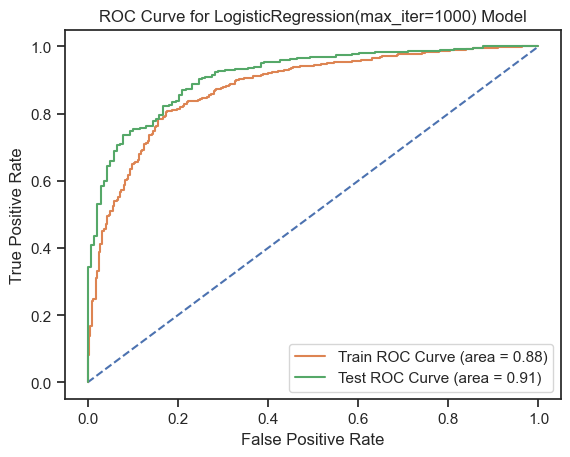

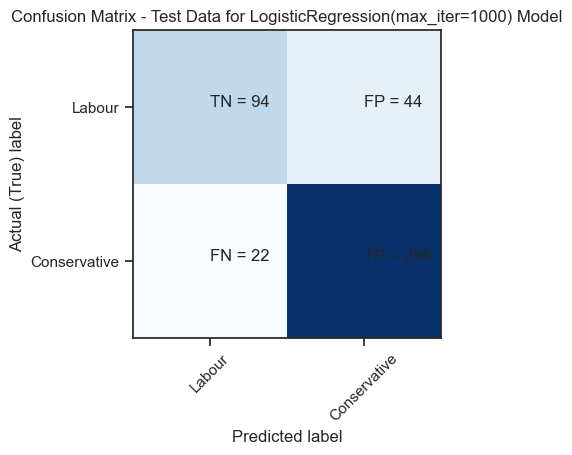

Model:  Logistic Regression
Confusion Matrix for Train Data:
[[214 108]
 [ 72 667]]
Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.75      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061

-----------------------
Model:  Logistic Regression
Confusion Matrix for Test Data:
[[ 94  44]
 [ 22 296]]
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456

-----------------------


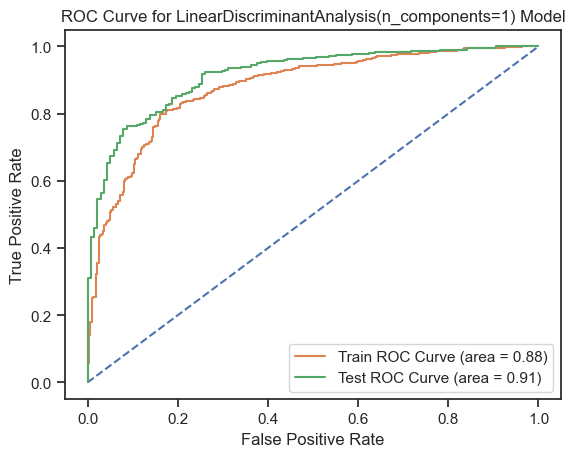

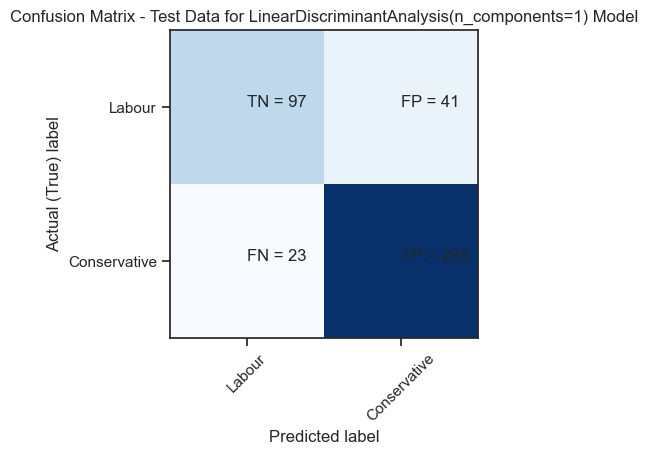

Model:  LDA
Confusion Matrix for Train Data:
[[219 103]
 [ 85 654]]
Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       322
           1       0.86      0.88      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061

-----------------------
Model:  LDA
Confusion Matrix for Test Data:
[[ 97  41]
 [ 23 295]]
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       138
           1       0.88      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456

-----------------------


In [53]:
# loop through the models
for name, model in models:

    # fit the model on the training data
    model.fit(X_train, y_train)

    # predict the training and test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # calculate the performance metrics

    accuracy_train_score = accuracy_score(y_train, y_pred_train)
    accuracy_test_score = accuracy_score(y_test, y_pred_test)
    confusion_train_score = confusion_matrix(y_train, y_pred_train)
    confusion_test_score = confusion_matrix(y_test, y_pred_test)
    report_train_score = classification_report(y_train, y_pred_train)
    report_test_score = classification_report(y_test, y_pred_test)
    # Calculate recall and precision scores
    recall_train_score = recall_score(y_train, y_pred_train)
    precision_train_score = precision_score(y_train, y_pred_train)
    recall_test_score = recall_score(y_test, y_pred_test)
    precision_test_score = precision_score(y_test, y_pred_test)

    # Get the predicted probabilities for train and test data
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # Calculate the roc_auc_score for train and test data
    train_roc_auc_score = roc_auc_score(y_train, y_train_proba)
    test_roc_auc_score = roc_auc_score(y_test, y_test_proba)

    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_proba)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_proba)
    
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot ROC curves
    plt.plot(train_fpr, train_tpr, label='Train ROC Curve (area = %0.2f)' % train_roc_auc_score)
    plt.plot(test_fpr, test_tpr, label='Test ROC Curve (area = %0.2f)' % test_roc_auc_score)


    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for {} Model".format(model))
    plt.legend(loc="lower right")
    plt.show()
    
    # Plot Confusion Matrix
    conf_mat(y_test, y_pred_test)
    
    # Print the confusion matrix and classification report for train data
    print('Model: ', name)
    print('Confusion Matrix for Train Data:')
    print(confusion_matrix(y_train, y_pred_train))
    print('Classification Report for Train Data:')
    print(classification_report(y_train, y_pred_train))
    print('-----------------------')
    
    # Print the confusion matrix and classification report for test data
    print('Model: ', name)
    print('Confusion Matrix for Test Data:')
    print(confusion_matrix(y_test, y_pred_test))
    print('Classification Report for Test Data:')
    print(classification_report(y_test, y_pred_test))
    print('-----------------------')

    # append the results to the respective lists
    model_names.append(name)
    accuracy_train.append(accuracy_train_score)
    accuracy_test.append(accuracy_test_score)
    confusion_train.append(confusion_train_score)
    confusion_test.append(confusion_test_score)
    report_train.append(report_train_score)
    report_test.append(report_test_score)
    roc_auc_train.append(train_roc_auc_score)
    roc_auc_test.append(test_roc_auc_score)
    
    recall_train.append(recall_train_score)
    recall_test.append(recall_test_score)
    precision_train.append(precision_train_score)
    precision_test.append(precision_test_score)
    

In [54]:
# create a dataframe to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy (train)': accuracy_train,
    'Accuracy (test)': accuracy_test,
    'ROC AUC (train)': roc_auc_train,
    'ROC AUC (test)': roc_auc_test,
    'Recall (train)': recall_train,
    'Recall (test)': recall_test,
    'Precision (train)': precision_train,
    'Precision (test)': precision_test
})

In [55]:
results_df

,Model,Accuracy (train),Accuracy (test),ROC AUC (train),ROC AUC (test),Recall (train),Recall (test),Precision (train),Precision (test)
0,Logistic Regression,0.830349,0.855263,0.877327,0.912588,0.902571,0.930818,0.860645,0.870588
1,LDA,0.822809,0.859649,0.877310,0.914866,0.884980,0.927673,0.863937,0.877976


Based on these results & classification reports, both models have similar performance in terms of accuracy, precision, and F1-score. However, the Logistic Regression model achieves slightly higher accuracy and F1-scores on both train and test data compared to LDA.

Therefore, based on the provided information, the Logistic Regression model may be considered a slightly better model for this particular classification task.

## KNN and Naive Bayes Model:

1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)
4

In [56]:
# Define the models
models = []
models = [('KNN', KNeighborsClassifier()),('Naive Bayes', GaussianNB())]

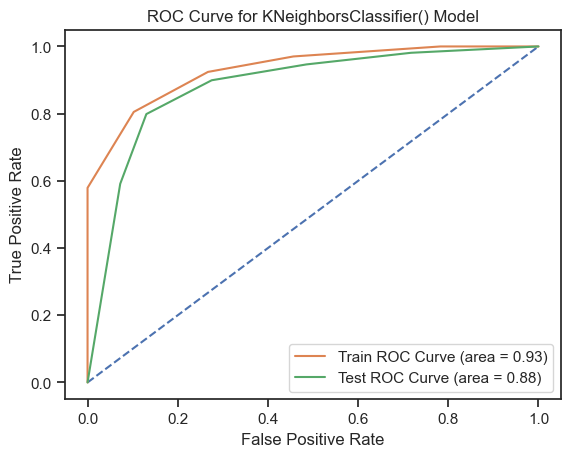

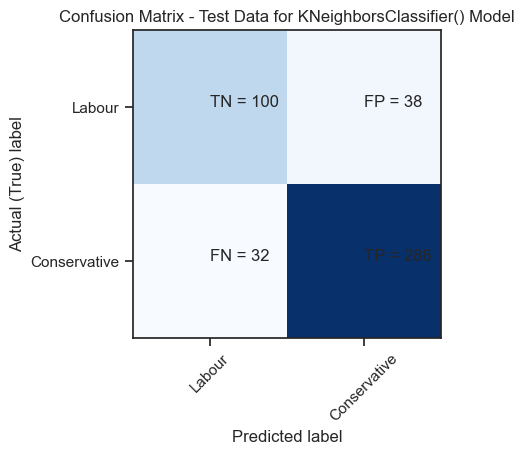

Model:  KNN
Confusion Matrix for Train Data:
[[236  86]
 [ 56 683]]
Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       322
           1       0.89      0.92      0.91       739

    accuracy                           0.87      1061
   macro avg       0.85      0.83      0.84      1061
weighted avg       0.86      0.87      0.86      1061

-----------------------
Model:  KNN
Confusion Matrix for Test Data:
[[100  38]
 [ 32 286]]
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       138
           1       0.88      0.90      0.89       318

    accuracy                           0.85       456
   macro avg       0.82      0.81      0.82       456
weighted avg       0.84      0.85      0.85       456

-----------------------


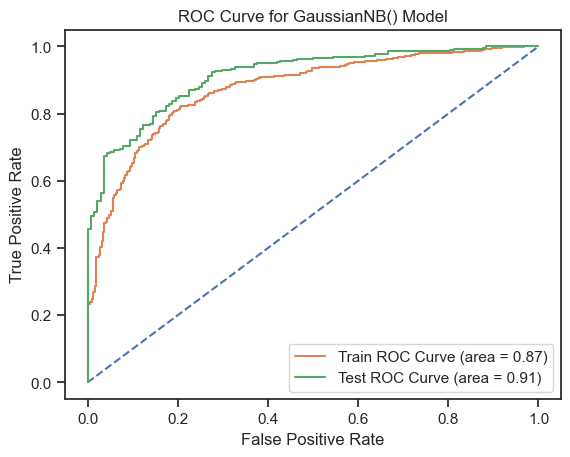

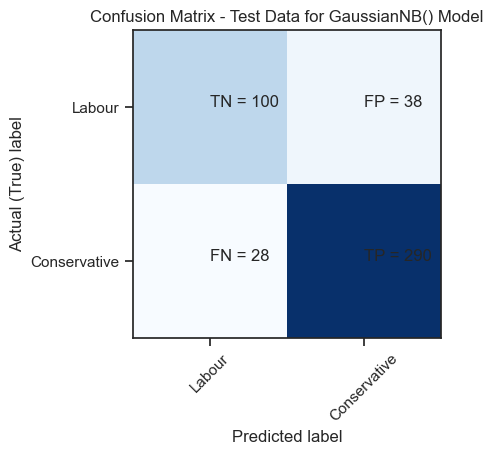

Model:  Naive Bayes
Confusion Matrix for Train Data:
[[223  99]
 [ 92 647]]
Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       322
           1       0.87      0.88      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061

-----------------------
Model:  Naive Bayes
Confusion Matrix for Test Data:
[[100  38]
 [ 28 290]]
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       138
           1       0.88      0.91      0.90       318

    accuracy                           0.86       456
   macro avg       0.83      0.82      0.82       456
weighted avg       0.85      0.86      0.85       456

-----------------------


In [57]:
# loop through the models
for name, model in models:

    # fit the model on the training data
    model.fit(X_train, y_train)

    # predict the training and test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # calculate the performance metrics

    accuracy_train_score = accuracy_score(y_train, y_pred_train)
    accuracy_test_score = accuracy_score(y_test, y_pred_test)
    confusion_train_score = confusion_matrix(y_train, y_pred_train)
    confusion_test_score = confusion_matrix(y_test, y_pred_test)
    report_train_score = classification_report(y_train, y_pred_train)
    report_test_score = classification_report(y_test, y_pred_test)

    # Get the predicted probabilities for train and test data
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # Calculate the roc_auc_score for train and test data
    train_roc_auc_score = roc_auc_score(y_train, y_train_proba)
    test_roc_auc_score = roc_auc_score(y_test, y_test_proba)

    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_proba)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_proba)
    
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot ROC curves
    plt.plot(train_fpr, train_tpr, label='Train ROC Curve (area = %0.2f)' % train_roc_auc_score)
    plt.plot(test_fpr, test_tpr, label='Test ROC Curve (area = %0.2f)' % test_roc_auc_score)


    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for {} Model".format(model))
    plt.legend(loc="lower right")
    plt.show()
    
    # Plot Confusion Matrix
    conf_mat(y_test, y_pred_test)
    
    # Print the confusion matrix and classification report for train data
    print('Model: ', name)
    print('Confusion Matrix for Train Data:')
    print(confusion_matrix(y_train, y_pred_train))
    print('Classification Report for Train Data:')
    print(classification_report(y_train, y_pred_train))
    print('-----------------------')
    
    # Print the confusion matrix and classification report for test data
    print('Model: ', name)
    print('Confusion Matrix for Test Data:')
    print(confusion_matrix(y_test, y_pred_test))
    print('Classification Report for Test Data:')
    print(classification_report(y_test, y_pred_test))
    print('-----------------------')
    
    # Calculate recall and precision scores
    recall_train_score = recall_score(y_train, y_pred_train)
    precision_train_score = precision_score(y_train, y_pred_train)
    recall_test_score = recall_score(y_test, y_pred_test)
    precision_test_score = precision_score(y_test, y_pred_test)

    # append the results to the respective lists
    model_names.append(name)
    accuracy_train.append(accuracy_train_score)
    accuracy_test.append(accuracy_test_score)
    confusion_train.append(confusion_train_score)
    confusion_test.append(confusion_test_score)
    report_train.append(report_train_score)
    report_test.append(report_test_score)
    roc_auc_train.append(train_roc_auc_score)
    roc_auc_test.append(test_roc_auc_score)
    recall_train.append(recall_train_score)
    recall_test.append(recall_test_score)
    precision_train.append(precision_train_score)
    precision_test.append(precision_test_score)

In [58]:
# create a dataframe to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy (train)': accuracy_train,
    'Accuracy (test)': accuracy_test,
    'ROC AUC (train)': roc_auc_train,
    'ROC AUC (test)': roc_auc_test,
    'Recall (train)': recall_train,
    'Recall (test)': recall_test,
    'Precision (train)': precision_train,
    'Precision (test)': precision_test
})

In [59]:
results_df

,Model,Accuracy (train),Accuracy (test),ROC AUC (train),ROC AUC (test),Recall (train),Recall (test),Precision (train),Precision (test)
0,Logistic Regression,0.830349,0.855263,0.877327,0.912588,0.902571,0.930818,0.860645,0.870588
1,LDA,0.822809,0.859649,0.877310,0.914866,0.884980,0.927673,0.863937,0.877976
2,KNN,0.866164,0.846491,0.931326,0.882155,0.924222,0.899371,0.888166,0.882716
3,Naive Bayes,0.819981,0.855263,0.873726,0.912770,0.875507,0.911950,0.867292,0.884146


## Model Tuning

1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.
7

### Grid Search on Logistic Regression:

In [60]:
# Create an instance of the Logistic Regression model
lr_model = LogisticRegression()

# Define the parameter grid
lr_param_grid = {'C': [0.1, 1, 10],
                 'penalty': ['l1', 'l2']}

# Perform grid search
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)

# Get the best parameters and create the final model
lr_best_params = lr_grid_search.best_params_
lr_model = LogisticRegression(**lr_best_params)

# Fit the final model on the training data
lr_model.fit(X_train, y_train)

# Predict on the training and test data
train_predictions = lr_model.predict(X_train)
test_predictions = lr_model.predict(X_test)

# Calculate accuracy on training and test data
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

C:\Users\lsreeram\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lsreeram\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lsreeram\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\lsreeram\AppData\Roaming\Python\Python39\site-packages\sklea

In [61]:
print('Grid Search on Logistic',train_accuracy, test_accuracy)

Grid Search on Logistic 0.8303487276154571 0.8552631578947368


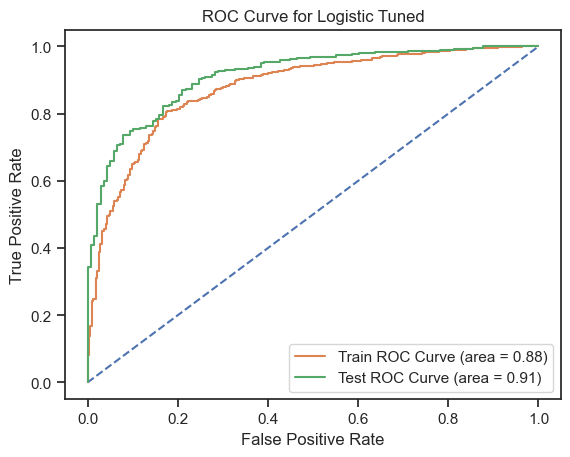

Logistic Tuned: 
Confusion Matrix for Train Data:
[[214 108]
 [ 72 667]]
Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.75      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061

-----------------------
Logistic Tuned: 
Confusion Matrix for Test Data:
[[ 94  44]
 [ 22 296]]
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456

-----------------------


In [62]:
# predict the training and test data
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

# calculate the performance metrics

accuracy_train_score = accuracy_score(y_train, y_pred_train)
accuracy_test_score = accuracy_score(y_test, y_pred_test)
confusion_train_score = confusion_matrix(y_train, y_pred_train)
confusion_test_score = confusion_matrix(y_test, y_pred_test)
report_train_score = classification_report(y_train, y_pred_train)
report_test_score = classification_report(y_test, y_pred_test)

# Calculate recall and precision scores
recall_train_score = recall_score(y_train, y_pred_train)
precision_train_score = precision_score(y_train, y_pred_train)
recall_test_score = recall_score(y_test, y_pred_test)
precision_test_score = precision_score(y_test, y_pred_test)
    
# Get the predicted probabilities for train and test data
y_train_proba = lr_model.predict_proba(X_train)[:, 1]
y_test_proba = lr_model.predict_proba(X_test)[:, 1]

# Calculate the roc_auc_score for train and test data
train_roc_auc_score = roc_auc_score(y_train, y_train_proba)
test_roc_auc_score = roc_auc_score(y_test, y_test_proba)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_proba)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_proba)

plt.plot([0, 1], [0, 1], linestyle='--')
# plot ROC curves
plt.plot(train_fpr, train_tpr, label='Train ROC Curve (area = %0.2f)' % train_roc_auc_score)
plt.plot(test_fpr, test_tpr, label='Test ROC Curve (area = %0.2f)' % test_roc_auc_score)


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Tuned")
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
#conf_mat(y_test, y_pred_test)

# Print the confusion matrix and classification report for train data
print('Logistic Tuned: ')
print('Confusion Matrix for Train Data:')
print(confusion_matrix(y_train, y_pred_train))
print('Classification Report for Train Data:')
print(classification_report(y_train, y_pred_train))
print('-----------------------')

# Print the confusion matrix and classification report for test data
print('Logistic Tuned: ')
print('Confusion Matrix for Test Data:')
print(confusion_matrix(y_test, y_pred_test))
print('Classification Report for Test Data:')
print(classification_report(y_test, y_pred_test))
print('-----------------------')

# append the results to the respective lists
model_names.append('Logistic Tuned')
accuracy_train.append(accuracy_train_score)
accuracy_test.append(accuracy_test_score)
confusion_train.append(confusion_train_score)
confusion_test.append(confusion_test_score)
report_train.append(report_train_score)
report_test.append(report_test_score)
roc_auc_train.append(train_roc_auc_score)
roc_auc_test.append(test_roc_auc_score)
recall_train.append(recall_train_score)
recall_test.append(recall_test_score)
precision_train.append(precision_train_score)
precision_test.append(precision_test_score)

In [63]:
# create a dataframe to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy (train)': accuracy_train,
    'Accuracy (test)': accuracy_test,
    'ROC AUC (train)': roc_auc_train,
    'ROC AUC (test)': roc_auc_test,
    'Recall (train)': recall_train,
    'Recall (test)': recall_test,
    'Precision (train)': precision_train,
    'Precision (test)': precision_test
})
results_df

,Model,Accuracy (train),Accuracy (test),ROC AUC (train),ROC AUC (test),Recall (train),Recall (test),Precision (train),Precision (test)
0,Logistic Regression,0.830349,0.855263,0.877327,0.912588,0.902571,0.930818,0.860645,0.870588
1,LDA,0.822809,0.859649,0.877310,0.914866,0.884980,0.927673,0.863937,0.877976
2,KNN,0.866164,0.846491,0.931326,0.882155,0.924222,0.899371,0.888166,0.882716
3,Naive Bayes,0.819981,0.855263,0.873726,0.912770,0.875507,0.911950,0.867292,0.884146
4,Logistic Tuned,0.830349,0.855263,0.877327,0.912588,0.902571,0.930818,0.860645,0.870588


### Grid Search on KNN:

In [65]:
# Create an instance of the KNN model
knn_model = KNeighborsClassifier()

# Define the parameter grid
knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15,17]}

# Perform grid search
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

# Get the best parameters and create the final model
knn_best_params = knn_grid_search.best_params_
knn_best_model = KNeighborsClassifier(**knn_best_params)

#best_estimator_ gives the best model automatically
#knn_model = knn_grid_search.best_estimator_

# Fit the final model on the training data
knn_best_model.fit(X_train, y_train)

# Predict on the training and test data
train_predictions = knn_best_model.predict(X_train)
test_predictions = knn_best_model.predict(X_test)

# Calculate accuracy on training and test data
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the results
print("Best Hyperparameters:", knn_best_params)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'n_neighbors': 13}
Test Accuracy: 0.8530701754385965


In [66]:
print('Grid Search on KNN',train_accuracy, test_accuracy)

Grid Search on KNN 0.8378887841658812 0.8530701754385965


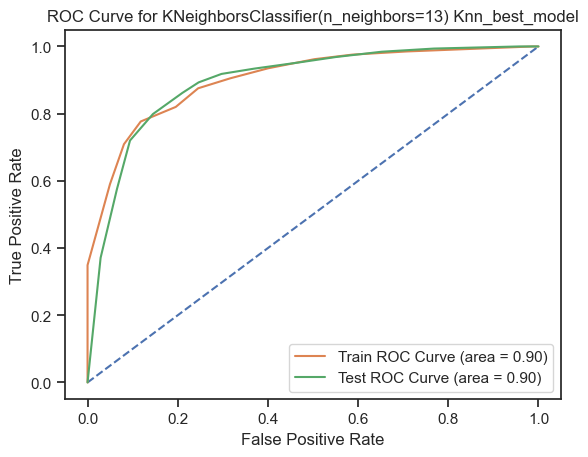

KNN Tuned: 
Confusion Matrix for Train Data:
[[220 102]
 [ 70 669]]
Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       322
           1       0.87      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.84      1061

-----------------------
KNN Tuned: 
Confusion Matrix for Test Data:
[[ 97  41]
 [ 26 292]]
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       138
           1       0.88      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.83      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456

-----------------------


In [67]:
# predict the training and test data
y_pred_train = knn_best_model.predict(X_train)
y_pred_test = knn_best_model.predict(X_test)

# calculate the performance metrics

accuracy_train_score = accuracy_score(y_train, y_pred_train)
accuracy_test_score = accuracy_score(y_test, y_pred_test)
confusion_train_score = confusion_matrix(y_train, y_pred_train)
confusion_test_score = confusion_matrix(y_test, y_pred_test)
report_train_score = classification_report(y_train, y_pred_train)
report_test_score = classification_report(y_test, y_pred_test)
# Calculate recall and precision scores
recall_train_score = recall_score(y_train, y_pred_train)
precision_train_score = precision_score(y_train, y_pred_train)
recall_test_score = recall_score(y_test, y_pred_test)
precision_test_score = precision_score(y_test, y_pred_test)

# Get the predicted probabilities for train and test data
y_train_proba = knn_best_model.predict_proba(X_train)[:, 1]
y_test_proba = knn_best_model.predict_proba(X_test)[:, 1]

# Calculate the roc_auc_score for train and test data
train_roc_auc_score = roc_auc_score(y_train, y_train_proba)
test_roc_auc_score = roc_auc_score(y_test, y_test_proba)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_proba)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_proba)

plt.plot([0, 1], [0, 1], linestyle='--')
# plot ROC curves
plt.plot(train_fpr, train_tpr, label='Train ROC Curve (area = %0.2f)' % train_roc_auc_score)
plt.plot(test_fpr, test_tpr, label='Test ROC Curve (area = %0.2f)' % test_roc_auc_score)


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for {} Knn_best_model".format(knn_best_model))
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
#conf_mat(y_test, y_pred_test)

# Print the confusion matrix and classification report for train data
print('KNN Tuned: ')
print('Confusion Matrix for Train Data:')
print(confusion_matrix(y_train, y_pred_train))
print('Classification Report for Train Data:')
print(classification_report(y_train, y_pred_train))
print('-----------------------')

# Print the confusion matrix and classification report for test data
print('KNN Tuned: ')
print('Confusion Matrix for Test Data:')
print(confusion_matrix(y_test, y_pred_test))
print('Classification Report for Test Data:')
print(classification_report(y_test, y_pred_test))
print('-----------------------')

# append the results to the respective lists
model_names.append('KNN Tuned')
accuracy_train.append(accuracy_train_score)
accuracy_test.append(accuracy_test_score)
confusion_train.append(confusion_train_score)
confusion_test.append(confusion_test_score)
report_train.append(report_train_score)
report_test.append(report_test_score)
roc_auc_train.append(train_roc_auc_score)
roc_auc_test.append(test_roc_auc_score)
recall_train.append(recall_train_score)
recall_test.append(recall_test_score)
precision_train.append(precision_train_score)
precision_test.append(precision_test_score)

In [68]:
# create a dataframe to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy (train)': accuracy_train,
    'Accuracy (test)': accuracy_test,
    'ROC AUC (train)': roc_auc_train,
    'ROC AUC (test)': roc_auc_test,
    'Recall (train)': recall_train,
    'Recall (test)': recall_test,
    'Precision (train)': precision_train,
    'Precision (test)': precision_test
})

### Grid Search on Naive Bayes:

In [69]:
print('Grid Search on Naive Bayes',train_accuracy, test_accuracy)

Grid Search on Naive Bayes 0.8378887841658812 0.8530701754385965


### Random Forest

In [70]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

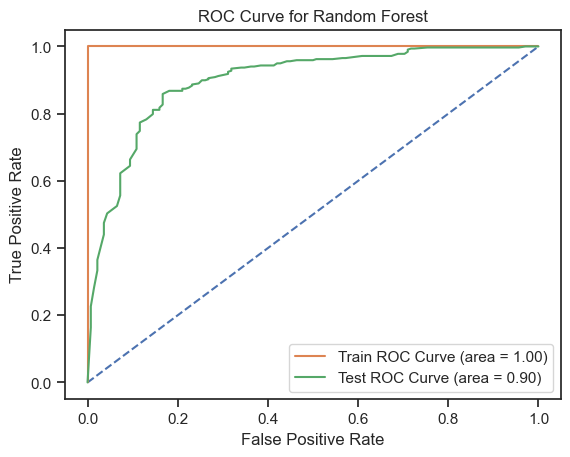

RF_model: 
Confusion Matrix for Train Data:
[[322   0]
 [  0 739]]
Classification Report for Train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00       739

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061

-----------------------
RF_model: 
Confusion Matrix for Test Data:
[[ 95  43]
 [ 26 292]]
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.79      0.69      0.73       138
           1       0.87      0.92      0.89       318

    accuracy                           0.85       456
   macro avg       0.83      0.80      0.81       456
weighted avg       0.85      0.85      0.85       456

-----------------------


In [76]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

# predict the training and test data
y_pred_train = RF_model.predict(X_train)
y_pred_test = RF_model.predict(X_test)

# calculate the performance metrics

accuracy_train_score = accuracy_score(y_train, y_pred_train)
accuracy_test_score = accuracy_score(y_test, y_pred_test)
confusion_train_score = confusion_matrix(y_train, y_pred_train)
confusion_test_score = confusion_matrix(y_test, y_pred_test)
report_train_score = classification_report(y_train, y_pred_train)
report_test_score = classification_report(y_test, y_pred_test)
# Calculate recall and precision scores
recall_train_score = recall_score(y_train, y_pred_train)
precision_train_score = precision_score(y_train, y_pred_train)
recall_test_score = recall_score(y_test, y_pred_test)
precision_test_score = precision_score(y_test, y_pred_test)

# Get the predicted probabilities for train and test data
y_train_proba = RF_model.predict_proba(X_train)[:, 1]
y_test_proba = RF_model.predict_proba(X_test)[:, 1]

# Calculate the roc_auc_score for train and test data
train_roc_auc_score = roc_auc_score(y_train, y_train_proba)
test_roc_auc_score = roc_auc_score(y_test, y_test_proba)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_proba)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_proba)

plt.plot([0, 1], [0, 1], linestyle='--')
# plot ROC curves
plt.plot(train_fpr, train_tpr, label='Train ROC Curve (area = %0.2f)' % train_roc_auc_score)
plt.plot(test_fpr, test_tpr, label='Test ROC Curve (area = %0.2f)' % test_roc_auc_score)


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
#conf_mat(y_test, y_pred_test)

# Print the confusion matrix and classification report for train data
print('RF_model: ')
print('Confusion Matrix for Train Data:')
print(confusion_matrix(y_train, y_pred_train))
print('Classification Report for Train Data:')
print(classification_report(y_train, y_pred_train))
print('-----------------------')

# Print the confusion matrix and classification report for test data
print('RF_model: ')
print('Confusion Matrix for Test Data:')
print(confusion_matrix(y_test, y_pred_test))
print('Classification Report for Test Data:')
print(classification_report(y_test, y_pred_test))
print('-----------------------')

# append the results to the respective lists
model_names.append('Random Forest')
accuracy_train.append(accuracy_train_score)
accuracy_test.append(accuracy_test_score)
confusion_train.append(confusion_train_score)
confusion_test.append(confusion_test_score)
report_train.append(report_train_score)
report_test.append(report_test_score)
roc_auc_train.append(train_roc_auc_score)
roc_auc_test.append(test_roc_auc_score)
recall_train.append(recall_train_score)
recall_test.append(recall_test_score)
precision_train.append(precision_train_score)
precision_test.append(precision_test_score)


### Random Forest Tuned

In [71]:
# Create a Random Forest base estimator
rf_base_estimator = RandomForestClassifier()

# Create a BaggingClassifier with Random Forest as the base estimator
bagging_model = BaggingClassifier(estimator=rf_base_estimator, random_state=1)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of base estimators
    'max_features': [None, 'sqrt', 'log2', 0.5],  # Maximum number of features to consider for each base estimator
}

# Perform grid search
grid_search = GridSearchCV(bagging_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_parameters = grid_search.best_params_
best_bagging_model = grid_search.best_estimator_

#best_bagging_model = grid_search(**best_parameters)

# Fit the best model on the training data
best_bagging_model.fit(X_train, y_train)

C:\Users\lsreeram\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lsreeram\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lsreeram\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_bagging.py", line 326, in fit
    self._validate_params()
  File "C:\Users\lsreeram\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 600, in _validate_params


BaggingClassifier(estimator=RandomForestClassifier(), max_features=0.5,
                  n_estimators=200, random_state=1)

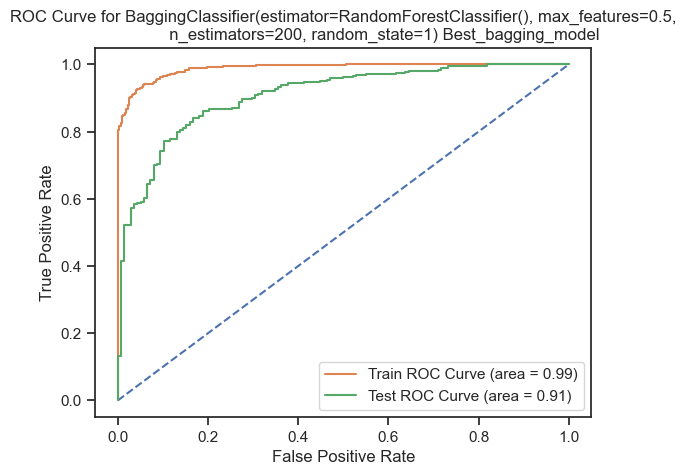

Best_bagging_model: 
Confusion Matrix for Train Data:
[[269  53]
 [  8 731]]
Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       322
           1       0.93      0.99      0.96       739

    accuracy                           0.94      1061
   macro avg       0.95      0.91      0.93      1061
weighted avg       0.94      0.94      0.94      1061

-----------------------
Best_bagging_model: 
Confusion Matrix for Test Data:
[[ 81  57]
 [ 17 301]]
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.83      0.59      0.69       138
           1       0.84      0.95      0.89       318

    accuracy                           0.84       456
   macro avg       0.83      0.77      0.79       456
weighted avg       0.84      0.84      0.83       456

-----------------------


In [72]:
# predict the training and test data
y_pred_train = best_bagging_model.predict(X_train)
y_pred_test = best_bagging_model.predict(X_test)

# calculate the performance metrics

accuracy_train_score = accuracy_score(y_train, y_pred_train)
accuracy_test_score = accuracy_score(y_test, y_pred_test)
confusion_train_score = confusion_matrix(y_train, y_pred_train)
confusion_test_score = confusion_matrix(y_test, y_pred_test)
report_train_score = classification_report(y_train, y_pred_train)
report_test_score = classification_report(y_test, y_pred_test)
# Calculate recall and precision scores
recall_train_score = recall_score(y_train, y_pred_train)
precision_train_score = precision_score(y_train, y_pred_train)
recall_test_score = recall_score(y_test, y_pred_test)
precision_test_score = precision_score(y_test, y_pred_test)

# Get the predicted probabilities for train and test data
y_train_proba = best_bagging_model.predict_proba(X_train)[:, 1]
y_test_proba = best_bagging_model.predict_proba(X_test)[:, 1]

# Calculate the roc_auc_score for train and test data
train_roc_auc_score = roc_auc_score(y_train, y_train_proba)
test_roc_auc_score = roc_auc_score(y_test, y_test_proba)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_proba)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_proba)

plt.plot([0, 1], [0, 1], linestyle='--')
# plot ROC curves
plt.plot(train_fpr, train_tpr, label='Train ROC Curve (area = %0.2f)' % train_roc_auc_score)
plt.plot(test_fpr, test_tpr, label='Test ROC Curve (area = %0.2f)' % test_roc_auc_score)


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for {} Best_bagging_model".format(best_bagging_model))
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
#conf_mat(y_test, y_pred_test)

# Print the confusion matrix and classification report for train data
print('Best_bagging_model: ')
print('Confusion Matrix for Train Data:')
print(confusion_matrix(y_train, y_pred_train))
print('Classification Report for Train Data:')
print(classification_report(y_train, y_pred_train))
print('-----------------------')

# Print the confusion matrix and classification report for test data
print('Best_bagging_model: ')
print('Confusion Matrix for Test Data:')
print(confusion_matrix(y_test, y_pred_test))
print('Classification Report for Test Data:')
print(classification_report(y_test, y_pred_test))
print('-----------------------')

# append the results to the respective lists
model_names.append('Random Forest Tuned')
accuracy_train.append(accuracy_train_score)
accuracy_test.append(accuracy_test_score)
confusion_train.append(confusion_train_score)
confusion_test.append(confusion_test_score)
report_train.append(report_train_score)
report_test.append(report_test_score)
roc_auc_train.append(train_roc_auc_score)
roc_auc_test.append(test_roc_auc_score)
recall_train.append(recall_train_score)
recall_test.append(recall_test_score)
precision_train.append(precision_train_score)
precision_test.append(precision_test_score)

In [74]:
# create a dataframe to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy (train)': accuracy_train,
    'Accuracy (test)': accuracy_test,
    'ROC AUC (train)': roc_auc_train,
    'ROC AUC (test)': roc_auc_test,
    'Recall (train)': recall_train,
    'Recall (test)': recall_test,
    'Precision (train)': precision_train,
    'Precision (test)': precision_test
})
results_df

,Model,Accuracy (train),Accuracy (test),ROC AUC (train),ROC AUC (test),Recall (train),Recall (test),Precision (train),Precision (test)
0,Logistic Regression,0.830349,0.855263,0.877327,0.912588,0.902571,0.930818,0.860645,0.870588
1,LDA,0.822809,0.859649,0.877310,0.914866,0.884980,0.927673,0.863937,0.877976
2,KNN,0.866164,0.846491,0.931326,0.882155,0.924222,0.899371,0.888166,0.882716
3,Naive Bayes,0.819981,0.855263,0.873726,0.912770,0.875507,0.911950,0.867292,0.884146
4,Logistic Tuned,0.830349,0.855263,0.877327,0.912588,0.902571,0.930818,0.860645,0.870588
5,KNN Tuned,0.837889,0.853070,0.903101,0.896101,0.905277,0.918239,0.867704,0.876877
6,Random Forest Tuned,0.942507,0.837719,0.988263,0.907529,0.989175,0.946541,0.932398,0.840782


### AdaBoost & AdaBoost Tuned 

In [79]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

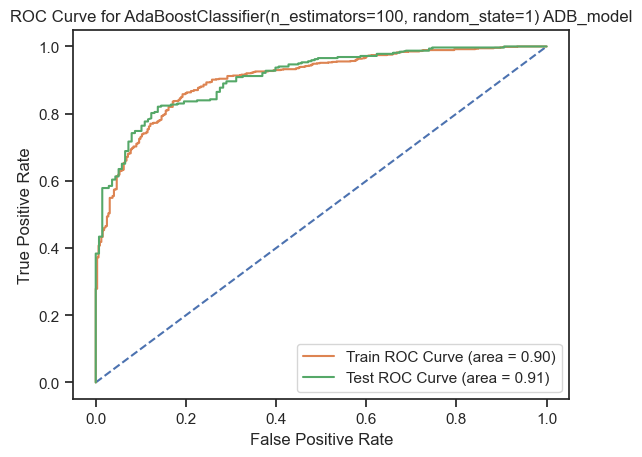

ADB_model: 
Confusion Matrix for Train Data:
[[228  94]
 [ 66 673]]
Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       322
           1       0.88      0.91      0.89       739

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061

-----------------------
ADB_model: 
Confusion Matrix for Test Data:
[[ 95  43]
 [ 32 286]]
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       138
           1       0.87      0.90      0.88       318

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.84      0.83       456

-----------------------


In [81]:
# predict the training and test data
y_pred_train = ADB_model.predict(X_train)
y_pred_test = ADB_model.predict(X_test)

# calculate the performance metrics

accuracy_train_score = accuracy_score(y_train, y_pred_train)
accuracy_test_score = accuracy_score(y_test, y_pred_test)
confusion_train_score = confusion_matrix(y_train, y_pred_train)
confusion_test_score = confusion_matrix(y_test, y_pred_test)
report_train_score = classification_report(y_train, y_pred_train)
report_test_score = classification_report(y_test, y_pred_test)
# Calculate recall and precision scores
recall_train_score = recall_score(y_train, y_pred_train)
precision_train_score = precision_score(y_train, y_pred_train)
recall_test_score = recall_score(y_test, y_pred_test)
precision_test_score = precision_score(y_test, y_pred_test)

# Get the predicted probabilities for train and test data
y_train_proba = ADB_model.predict_proba(X_train)[:, 1]
y_test_proba = ADB_model.predict_proba(X_test)[:, 1]

# Calculate the roc_auc_score for train and test data
train_roc_auc_score = roc_auc_score(y_train, y_train_proba)
test_roc_auc_score = roc_auc_score(y_test, y_test_proba)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_proba)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_proba)

plt.plot([0, 1], [0, 1], linestyle='--')
# plot ROC curves
plt.plot(train_fpr, train_tpr, label='Train ROC Curve (area = %0.2f)' % train_roc_auc_score)
plt.plot(test_fpr, test_tpr, label='Test ROC Curve (area = %0.2f)' % test_roc_auc_score)


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for {} ADB_model".format(ADB_model))
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
#conf_mat(y_test, y_pred_test)

# Print the confusion matrix and classification report for train data
print('ADB_model: ')
print('Confusion Matrix for Train Data:')
print(confusion_matrix(y_train, y_pred_train))
print('Classification Report for Train Data:')
print(classification_report(y_train, y_pred_train))
print('-----------------------')

# Print the confusion matrix and classification report for test data
print('ADB_model: ')
print('Confusion Matrix for Test Data:')
print(confusion_matrix(y_test, y_pred_test))
print('Classification Report for Test Data:')
print(classification_report(y_test, y_pred_test))
print('-----------------------')

# append the results to the respective lists
model_names.append('Adaboost')
accuracy_train.append(accuracy_train_score)
accuracy_test.append(accuracy_test_score)
confusion_train.append(confusion_train_score)
confusion_test.append(confusion_test_score)
report_train.append(report_train_score)
report_test.append(report_test_score)
roc_auc_train.append(train_roc_auc_score)
roc_auc_test.append(test_roc_auc_score)
recall_train.append(recall_train_score)
recall_test.append(recall_test_score)
precision_train.append(precision_train_score)
precision_test.append(precision_test_score)

In [82]:
# create a dataframe to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy (train)': accuracy_train,
    'Accuracy (test)': accuracy_test,
    'ROC AUC (train)': roc_auc_train,
    'ROC AUC (test)': roc_auc_test,
    'Recall (train)': recall_train,
    'Recall (test)': recall_test,
    'Precision (train)': precision_train,
    'Precision (test)': precision_test
})
results_df

,Model,Accuracy (train),Accuracy (test),ROC AUC (train),ROC AUC (test),Recall (train),Recall (test),Precision (train),Precision (test)
0,Logistic Regression,0.830349,0.855263,0.877327,0.912588,0.902571,0.930818,0.860645,0.870588
1,LDA,0.822809,0.859649,0.877310,0.914866,0.884980,0.927673,0.863937,0.877976
2,KNN,0.866164,0.846491,0.931326,0.882155,0.924222,0.899371,0.888166,0.882716
3,Naive Bayes,0.819981,0.855263,0.873726,0.912770,0.875507,0.911950,0.867292,0.884146
4,Logistic Tuned,0.830349,0.855263,0.877327,0.912588,0.902571,0.930818,0.860645,0.870588
5,KNN Tuned,0.837889,0.853070,0.903101,0.896101,0.905277,0.918239,0.867704,0.876877
6,Random Forest Tuned,0.942507,0.837719,0.988263,0.907529,0.989175,0.946541,0.932398,0.840782
7,Random Forest,1.000000,0.848684,1.000000,0.898346,1.000000,0.918239,1.000000,0.871642
8,Adaboost,0.849199,0.835526,0.904046,0.908486,0.910690,0.899371,0.877445,0.869301


In [ ]:
# predict the training and test data
y_pred_train = ADB_best_model.predict(X_train)
y_pred_test = ADB_best_model.predict(X_test)

# calculate the performance metrics

accuracy_train_score = accuracy_score(y_train, y_pred_train)
accuracy_test_score = accuracy_score(y_test, y_pred_test)
confusion_train_score = confusion_matrix(y_train, y_pred_train)
confusion_test_score = confusion_matrix(y_test, y_pred_test)
report_train_score = classification_report(y_train, y_pred_train)
report_test_score = classification_report(y_test, y_pred_test)
# Calculate recall and precision scores
recall_train_score = recall_score(y_train, y_pred_train)
precision_train_score = precision_score(y_train, y_pred_train)
recall_test_score = recall_score(y_test, y_pred_test)
precision_test_score = precision_score(y_test, y_pred_test)

# Get the predicted probabilities for train and test data
y_train_proba = ADB_best_model.predict_proba(X_train)[:, 1]
y_test_proba = ADB_best_model.predict_proba(X_test)[:, 1]

# Calculate the roc_auc_score for train and test data
train_roc_auc_score = roc_auc_score(y_train, y_train_proba)
test_roc_auc_score = roc_auc_score(y_test, y_test_proba)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_proba)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_proba)

plt.plot([0, 1], [0, 1], linestyle='--')
# plot ROC curves
plt.plot(train_fpr, train_tpr, label='Train ROC Curve (area = %0.2f)' % train_roc_auc_score)
plt.plot(test_fpr, test_tpr, label='Test ROC Curve (area = %0.2f)' % test_roc_auc_score)


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for {} ADB_best_model".format(ADB_best_model))
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
#conf_mat(y_test, y_pred_test)

# Print the confusion matrix and classification report for train data
print('ADB_best_model: ')
print('Confusion Matrix for Train Data:')
print(confusion_matrix(y_train, y_pred_train))
print('Classification Report for Train Data:')
print(classification_report(y_train, y_pred_train))
print('-----------------------')

# Print the confusion matrix and classification report for test data
print('ADB_best_model: ')
print('Confusion Matrix for Test Data:')
print(confusion_matrix(y_test, y_pred_test))
print('Classification Report for Test Data:')
print(classification_report(y_test, y_pred_test))
print('-----------------------')

# append the results to the respective lists
model_names.append('Random Forest Tuned')
accuracy_train.append(accuracy_train_score)
accuracy_test.append(accuracy_test_score)
confusion_train.append(confusion_train_score)
confusion_test.append(confusion_test_score)
report_train.append(report_train_score)
report_test.append(report_test_score)
roc_auc_train.append(train_roc_auc_score)
roc_auc_test.append(test_roc_auc_score)
recall_train.append(recall_train_score)
recall_test.append(recall_test_score)
precision_train.append(precision_train_score)
precision_test.append(precision_test_score)


### Gradient Boosting & Gradient Boost Tuned

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

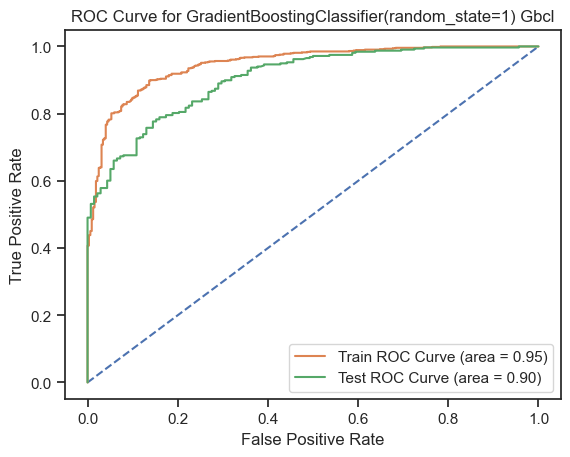

Gbcl: 
Confusion Matrix for Train Data:
[[250  72]
 [ 49 690]]
Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       322
           1       0.91      0.93      0.92       739

    accuracy                           0.89      1061
   macro avg       0.87      0.86      0.86      1061
weighted avg       0.88      0.89      0.88      1061

-----------------------
Gbcl: 
Confusion Matrix for Test Data:
[[ 94  44]
 [ 29 289]]
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       138
           1       0.87      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.84      0.84      0.84       456

-----------------------


In [88]:
# predict the training and test data
y_pred_train = gbcl.predict(X_train)
y_pred_test = gbcl.predict(X_test)

# calculate the performance metrics

accuracy_train_score = accuracy_score(y_train, y_pred_train)
accuracy_test_score = accuracy_score(y_test, y_pred_test)
confusion_train_score = confusion_matrix(y_train, y_pred_train)
confusion_test_score = confusion_matrix(y_test, y_pred_test)
report_train_score = classification_report(y_train, y_pred_train)
report_test_score = classification_report(y_test, y_pred_test)
# Calculate recall and precision scores
recall_train_score = recall_score(y_train, y_pred_train)
precision_train_score = precision_score(y_train, y_pred_train)
recall_test_score = recall_score(y_test, y_pred_test)
precision_test_score = precision_score(y_test, y_pred_test)

# Get the predicted probabilities for train and test data
y_train_proba = gbcl.predict_proba(X_train)[:, 1]
y_test_proba = gbcl.predict_proba(X_test)[:, 1]

# Calculate the roc_auc_score for train and test data
train_roc_auc_score = roc_auc_score(y_train, y_train_proba)
test_roc_auc_score = roc_auc_score(y_test, y_test_proba)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_proba)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_proba)

plt.plot([0, 1], [0, 1], linestyle='--')
# plot ROC curves
plt.plot(train_fpr, train_tpr, label='Train ROC Curve (area = %0.2f)' % train_roc_auc_score)
plt.plot(test_fpr, test_tpr, label='Test ROC Curve (area = %0.2f)' % test_roc_auc_score)


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for {} Gbcl".format(gbcl))
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
#conf_mat(y_test, y_pred_test)

# Print the confusion matrix and classification report for train data
print('Gbcl: ')
print('Confusion Matrix for Train Data:')
print(confusion_matrix(y_train, y_pred_train))
print('Classification Report for Train Data:')
print(classification_report(y_train, y_pred_train))
print('-----------------------')

# Print the confusion matrix and classification report for test data
print('Gbcl: ')
print('Confusion Matrix for Test Data:')
print(confusion_matrix(y_test, y_pred_test))
print('Classification Report for Test Data:')
print(classification_report(y_test, y_pred_test))
print('-----------------------')

# append the results to the respective lists
model_names.append('Gradient Boost')
accuracy_train.append(accuracy_train_score)
accuracy_test.append(accuracy_test_score)
confusion_train.append(confusion_train_score)
confusion_test.append(confusion_test_score)
report_train.append(report_train_score)
report_test.append(report_test_score)
roc_auc_train.append(train_roc_auc_score)
roc_auc_test.append(test_roc_auc_score)
recall_train.append(recall_train_score)
recall_test.append(recall_test_score)
precision_train.append(precision_train_score)
precision_test.append(precision_test_score)


In [89]:
# create a dataframe to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy (train)': accuracy_train,
    'Accuracy (test)': accuracy_test,
    'ROC AUC (train)': roc_auc_train,
    'ROC AUC (test)': roc_auc_test,
    'Recall (train)': recall_train,
    'Recall (test)': recall_test,
    'Precision (train)': precision_train,
    'Precision (test)': precision_test
})
results_df

,Model,Accuracy (train),Accuracy (test),ROC AUC (train),ROC AUC (test),Recall (train),Recall (test),Precision (train),Precision (test)
0,Logistic Regression,0.830349,0.855263,0.877327,0.912588,0.902571,0.930818,0.860645,0.870588
1,LDA,0.822809,0.859649,0.877310,0.914866,0.884980,0.927673,0.863937,0.877976
2,KNN,0.866164,0.846491,0.931326,0.882155,0.924222,0.899371,0.888166,0.882716
3,Naive Bayes,0.819981,0.855263,0.873726,0.912770,0.875507,0.911950,0.867292,0.884146
4,Logistic Tuned,0.830349,0.855263,0.877327,0.912588,0.902571,0.930818,0.860645,0.870588
5,KNN Tuned,0.837889,0.853070,0.903101,0.896101,0.905277,0.918239,0.867704,0.876877
6,Random Forest Tuned,0.942507,0.837719,0.988263,0.907529,0.989175,0.946541,0.932398,0.840782
7,Random Forest,1.000000,0.848684,1.000000,0.898346,1.000000,0.918239,1.000000,0.871642
8,Adaboost,0.849199,0.835526,0.904046,0.908486,0.910690,0.899371,0.877445,0.869301
9,Gradient Boost,0.885957,0.839912,0.947014,0.904407,0.933694,0.908805,0.905512,0.867868


### Gradient Boost Tuned

In [92]:
gbcl = GradientBoostingClassifier(random_state=1)

# Perform grid search
grid_search = GridSearchCV(gbcl, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_parameters = grid_search.best_params_
best_gbcl_model = grid_search.best_estimator_

#best_bagging_model = grid_search(**best_parameters)

# Fit the best model on the training data
best_gbcl_model.fit(X_train, y_train)

GradientBoostingClassifier(max_features='sqrt', n_estimators=200,
                           random_state=1)

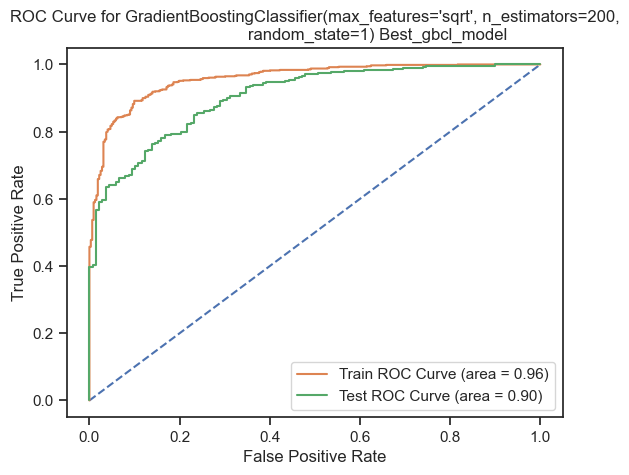

Best_gbcl_model: 
Confusion Matrix for Train Data:
[[263  59]
 [ 44 695]]
Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       322
           1       0.92      0.94      0.93       739

    accuracy                           0.90      1061
   macro avg       0.89      0.88      0.88      1061
weighted avg       0.90      0.90      0.90      1061

-----------------------
Best_gbcl_model: 
Confusion Matrix for Test Data:
[[ 94  44]
 [ 30 288]]
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       138
           1       0.87      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.84      0.84       456

-----------------------


In [94]:
# predict the training and test data
y_pred_train = best_gbcl_model.predict(X_train)
y_pred_test = best_gbcl_model.predict(X_test)

# calculate the performance metrics

accuracy_train_score = accuracy_score(y_train, y_pred_train)
accuracy_test_score = accuracy_score(y_test, y_pred_test)
confusion_train_score = confusion_matrix(y_train, y_pred_train)
confusion_test_score = confusion_matrix(y_test, y_pred_test)
report_train_score = classification_report(y_train, y_pred_train)
report_test_score = classification_report(y_test, y_pred_test)
# Calculate recall and precision scores
recall_train_score = recall_score(y_train, y_pred_train)
precision_train_score = precision_score(y_train, y_pred_train)
recall_test_score = recall_score(y_test, y_pred_test)
precision_test_score = precision_score(y_test, y_pred_test)

# Get the predicted probabilities for train and test data
y_train_proba = best_gbcl_model.predict_proba(X_train)[:, 1]
y_test_proba = best_gbcl_model.predict_proba(X_test)[:, 1]

# Calculate the roc_auc_score for train and test data
train_roc_auc_score = roc_auc_score(y_train, y_train_proba)
test_roc_auc_score = roc_auc_score(y_test, y_test_proba)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_proba)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_proba)

plt.plot([0, 1], [0, 1], linestyle='--')
# plot ROC curves
plt.plot(train_fpr, train_tpr, label='Train ROC Curve (area = %0.2f)' % train_roc_auc_score)
plt.plot(test_fpr, test_tpr, label='Test ROC Curve (area = %0.2f)' % test_roc_auc_score)


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for {} Best_gbcl_model".format(best_gbcl_model))
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
#conf_mat(y_test, y_pred_test)

# Print the confusion matrix and classification report for train data
print('Best_gbcl_model: ')
print('Confusion Matrix for Train Data:')
print(confusion_matrix(y_train, y_pred_train))
print('Classification Report for Train Data:')
print(classification_report(y_train, y_pred_train))
print('-----------------------')

# Print the confusion matrix and classification report for test data
print('Best_gbcl_model: ')
print('Confusion Matrix for Test Data:')
print(confusion_matrix(y_test, y_pred_test))
print('Classification Report for Test Data:')
print(classification_report(y_test, y_pred_test))
print('-----------------------')

# append the results to the respective lists
model_names.append('Gradeint Boost Tuned')
accuracy_train.append(accuracy_train_score)
accuracy_test.append(accuracy_test_score)
confusion_train.append(confusion_train_score)
confusion_test.append(confusion_test_score)
report_train.append(report_train_score)
report_test.append(report_test_score)
roc_auc_train.append(train_roc_auc_score)
roc_auc_test.append(test_roc_auc_score)
recall_train.append(recall_train_score)
recall_test.append(recall_test_score)
precision_train.append(precision_train_score)
precision_test.append(precision_test_score)


In [95]:
# create a dataframe to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy (train)': accuracy_train,
    'Accuracy (test)': accuracy_test,
    'ROC AUC (train)': roc_auc_train,
    'ROC AUC (test)': roc_auc_test,
    'Recall (train)': recall_train,
    'Recall (test)': recall_test,
    'Precision (train)': precision_train,
    'Precision (test)': precision_test
})
results_df

,Model,Accuracy (train),Accuracy (test),ROC AUC (train),ROC AUC (test),Recall (train),Recall (test),Precision (train),Precision (test)
0,Logistic Regression,0.830349,0.855263,0.877327,0.912588,0.902571,0.930818,0.860645,0.870588
1,LDA,0.822809,0.859649,0.877310,0.914866,0.884980,0.927673,0.863937,0.877976
2,KNN,0.866164,0.846491,0.931326,0.882155,0.924222,0.899371,0.888166,0.882716
3,Naive Bayes,0.819981,0.855263,0.873726,0.912770,0.875507,0.911950,0.867292,0.884146
4,Logistic Tuned,0.830349,0.855263,0.877327,0.912588,0.902571,0.930818,0.860645,0.870588
5,KNN Tuned,0.837889,0.853070,0.903101,0.896101,0.905277,0.918239,0.867704,0.876877
6,Random Forest Tuned,0.942507,0.837719,0.988263,0.907529,0.989175,0.946541,0.932398,0.840782
7,Random Forest,1.000000,0.848684,1.000000,0.898346,1.000000,0.918239,1.000000,0.871642
8,Adaboost,0.849199,0.835526,0.904046,0.908486,0.910690,0.899371,0.877445,0.869301
9,Gradient Boost,0.885957,0.839912,0.947014,0.904407,0.933694,0.908805,0.905512,0.867868


## Performance Metrics

1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)
7

Refer report

## Business Insights

1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.
5

Refer report

--Problem1 completed-